**Please note: Steps have been repeated in the project's solution below accordingly owing to the nature of question raised**

# <center>FE Project Whole

In [1]:
# Importing the libraries

# Basic
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import zscore 
from scipy.stats import ttest_rel # For testing the significance, for different sample used from the population
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE,SMOTENC
from collections import Counter
from sklearn.utils import resample

# Cross validation techniques
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

# Ensembles
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Dimensionality Reduction
from sklearn.decomposition import PCA
# Other general techniques will also be used to implement the same

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Pickling
import pickle

## 1. Import and explore the data:

In [2]:
# Importing the datasets by reading the appropriate CSV files

Data = pd.read_csv('Signal-data.csv')

In [3]:
# Checking the shape of the imported datasets

print('The data set shape:',Data.shape)

The data set shape: (1567, 592)


Thus, we can see that we have 1567 rows and 592 columns which is quite large in number

In [4]:
# Let's see our data

Data

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,22-07-2008 11:47,3040.34,2501.16,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5481,...,NaN,0.4948,0.0117,0.0034,2.3737,0.0184,0.0151,0.0042,82.0989,NaN
1,22-07-2008 14:00,2988.30,2519.05,2208.8556,1157.7224,1.5509,100.0,107.8022,0.1233,1.5362,...,47.1586,0.5036,0.0169,0.0039,3.3514,0.0229,0.0108,0.0032,47.1586,NaN
2,22-07-2008 15:30,2987.32,2528.81,NaN,NaN,NaN,NaN,NaN,0.1195,1.6343,...,NaN,0.5011,0.0117,0.0033,2.3308,0.0229,0.0108,0.0032,47.1586,NaN
3,23-07-2008 05:15,NaN,2481.85,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5559,...,34.4153,0.4947,0.0137,0.0041,2.7729,0.0175,0.0060,0.0023,34.4153,NaN
4,23-07-2008 19:22,3002.27,2497.45,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5465,...,114.5979,0.4977,0.0114,0.0037,2.2849,0.0250,0.0286,0.0075,114.5979,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0


As was seen from data originally that for the last column the alignment needs to be fixed and let's do so as priority.

In [5]:
# Let's see how many rows needs to be shifted to do re-alignment for the last column

Data['Pass/Fail'].isna().sum()

18

In [6]:
# Let's shift the rows to make our dataset optimal

Data['Pass/Fail'] = Data['Pass/Fail'].shift(periods=-18)

In [7]:
# Dropping the null rows at the end

Data.drop(Data.tail(18).index,inplace=True)

In [8]:
# Checking the information of the imported datasets

print(Data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 1548
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(591), object(1)
memory usage: 7.0+ MB
None


We 592 columns of which 590 are float, 1 is an integer and one is object type 

In [9]:
numerics = ['int16', 'int32', 'int64']
num_cols = Data.select_dtypes(include=numerics).columns.to_list()

In [10]:
num_cols

[]

In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
non_num_cols = Data.select_dtypes(exclude=numerics).columns.to_list()

In [12]:
non_num_cols

['Time']

We can see that the col_Time is an object type, col_Pass/Fail is an int type and rest is float

In [13]:
# Let's convert target column as interger

Data['Pass/Fail'] = Data['Pass/Fail'].astype('int')

In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 1548
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.0+ MB


In [15]:
# Let's first create a copy of our main dataset

data = Data.copy()

In [16]:
# Observing the dataset 'data_merged'
# First and last 5 rows displayed

data

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,22-07-2008 11:47,3040.34,2501.16,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5481,...,NaN,0.4948,0.0117,0.0034,2.3737,0.0184,0.0151,0.0042,82.0989,-1
1,22-07-2008 14:00,2988.30,2519.05,2208.8556,1157.7224,1.5509,100.0,107.8022,0.1233,1.5362,...,47.1586,0.5036,0.0169,0.0039,3.3514,0.0229,0.0108,0.0032,47.1586,-1
2,22-07-2008 15:30,2987.32,2528.81,NaN,NaN,NaN,NaN,NaN,0.1195,1.6343,...,NaN,0.5011,0.0117,0.0033,2.3308,0.0229,0.0108,0.0032,47.1586,-1
3,23-07-2008 05:15,NaN,2481.85,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5559,...,34.4153,0.4947,0.0137,0.0041,2.7729,0.0175,0.0060,0.0023,34.4153,-1
4,23-07-2008 19:22,3002.27,2497.45,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5465,...,114.5979,0.4977,0.0114,0.0037,2.2849,0.0250,0.0286,0.0075,114.5979,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,16-10-2008 15:13,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1545,16-10-2008 20:49,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1546,17-10-2008 05:26,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1547,17-10-2008 06:01,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


As we can see, we have missing values and the object type column is our target variable.

In [17]:
# Let's prefix column names for better understanding

data = data.add_prefix('col_')

In [18]:
data

,col_Time,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_581,col_582,col_583,col_584,col_585,col_586,col_587,col_588,col_589,col_Pass/Fail
0,22-07-2008 11:47,3040.34,2501.16,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5481,...,NaN,0.4948,0.0117,0.0034,2.3737,0.0184,0.0151,0.0042,82.0989,-1
1,22-07-2008 14:00,2988.30,2519.05,2208.8556,1157.7224,1.5509,100.0,107.8022,0.1233,1.5362,...,47.1586,0.5036,0.0169,0.0039,3.3514,0.0229,0.0108,0.0032,47.1586,-1
2,22-07-2008 15:30,2987.32,2528.81,NaN,NaN,NaN,NaN,NaN,0.1195,1.6343,...,NaN,0.5011,0.0117,0.0033,2.3308,0.0229,0.0108,0.0032,47.1586,-1
3,23-07-2008 05:15,NaN,2481.85,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5559,...,34.4153,0.4947,0.0137,0.0041,2.7729,0.0175,0.0060,0.0023,34.4153,-1
4,23-07-2008 19:22,3002.27,2497.45,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5465,...,114.5979,0.4977,0.0114,0.0037,2.2849,0.0250,0.0286,0.0075,114.5979,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,16-10-2008 15:13,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1545,16-10-2008 20:49,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1546,17-10-2008 05:26,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1547,17-10-2008 06:01,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [19]:
# Let's observe the values which might give us some more insights

data.describe(include='all')

,col_Time,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_581,col_582,col_583,col_584,col_585,col_586,col_587,col_588,col_589,col_Pass/Fail
count,1549,1543.000000,1542.000000,1535.000000,1535.000000,1535.000000,1535.0,1535.000000,1540.000000,1547.000000,...,605.000000,1548.000000,1548.000000,1548.000000,1548.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000
unique,1516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,15-10-2008 01:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3014.617025,2495.495383,2200.287873,1398.678866,4.232053,100.0,101.091224,0.121819,1.462330,...,98.027783,0.500115,0.015018,0.003780,3.005196,0.021427,0.016447,0.005276,99.815711,-0.870884
std,NaN,73.850987,80.469311,29.436192,442.942283,56.684272,0.0,6.260266,0.009010,0.074042,...,88.245884,0.003361,0.012661,0.002725,2.633309,0.012362,0.008802,0.002868,94.306079,0.491647
min,NaN,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,NaN,2966.325000,2452.112500,2180.888900,1084.377900,1.017700,100.0,97.880000,0.121100,1.410700,...,46.101600,0.497900,0.011600,0.003100,2.306950,0.013400,0.010600,0.003300,44.298800,-1.000000
50%,NaN,3011.490000,2498.975000,2200.988900,1285.214400,1.316800,100.0,101.512200,0.122400,1.461100,...,71.778000,0.500200,0.013800,0.003600,2.754550,0.020700,0.014800,0.004600,71.778000,-1.000000
75%,NaN,3057.045000,2538.550000,2217.866700,1592.172750,1.529100,100.0,104.530000,0.123800,1.516600,...,117.094500,0.502400,0.016500,0.004100,3.294725,0.027600,0.020300,0.006400,115.100500,-1.000000


- We can see different range of values for different variables.
- We can also see that some time values repeated and hence we might be having duplicates in our dataset.Also, we can see the number of unique values for time doesn't corresponds to the number of rows.
- Columns with 0 as all could also be seen in the dataset.
- We can see columns with low variance.

## 2. Data cleansing: 

### <center>Missing value treatment

### <center>Drop attribute/s if required using relevant functional knowledge

### <center>Make all relevant modifications on the data using both functional/logical reasoning/assumptions

In [20]:
# Checking for null values

data.isna().sum()

col_Time          0
col_0             6
col_1             7
col_2            14
col_3            14
                 ..
col_586           0
col_587           0
col_588           0
col_589           0
col_Pass/Fail     0
Length: 592, dtype: int64

- We can see that there are missing values.
- From the dataset it was seen that many columns are having too many missing values.
- It can also be observed that the date-time and target column don't have missing values.

In [21]:
# Checking for null values in details

mv = pd.DataFrame(data.isna().sum(),columns=['Missing_Values']).sort_values(by='Missing_Values',ascending=False)
mv

,Missing_Values
col_158,1411
col_292,1411
col_293,1411
col_157,1411
col_85,1323
...,...
col_386,0
col_361,0
col_360,0
col_359,0


- Missing values are arranged in descending order.
- Also, from the dataset it could be seen that we have columns where values are missing values majorly.

In [22]:
# Taking percentage of missing values for each column 

mv['Missing_Values'] = mv['Missing_Values']/len(data)*100

In [23]:
mv

,Missing_Values
col_158,91.091026
col_292,91.091026
col_293,91.091026
col_157,91.091026
col_85,85.409942
...,...
col_386,0.000000
col_361,0.000000
col_360,0.000000
col_359,0.000000


In [24]:
# Extracting variables which have more than 60% missing data
# Setting the threshold as 60%

variable = [ ]
for i in mv.index:
    if mv['Missing_Values'][i] >= 60:   
        variable.append(i)

In [25]:
len(variable)

24

In [26]:
# To be used later for future data

v1 = variable.copy()

We can see that we can remove 24 columns as they have more missing data with respect to our threshold

In [27]:
# Dropping unwanted columns

data.drop(variable, axis=1,inplace=True)

In [28]:
# Checking the shape of the data after removing columns with missing values as per the threshold

data.shape

(1549, 568)

Let's remove column with only 0s(zero variance) and also other columns where values are not 0 but variance is 0 as these columns cannot contribute to our goal.

In [29]:
# Checking and appending columns with zero variance so that it can be dropped

variable = [ ]
for i in data.loc[:,'col_0':'col_589'].columns:
    if data[i].var()==0:
        variable.append(i)

In [30]:
len(variable)

116

In [31]:
v2 = variable.copy()

We can filter out 116 columns based on low variance

In [32]:
# Dropping unwanted columns

data.drop(variable,axis=1,inplace=True)

In [33]:
# Checking the shape of the data after filtering on zero variance

data.shape

(1549, 452)

We can try removing more columns later based on low variance after scaling the data.

In [34]:
# Identifying duplicate records in the data

dupes = data.duplicated()
sum(dupes)

0

In [35]:
data.describe(include='all')

,col_Time,col_0,col_1,col_2,col_3,col_4,col_6,col_7,col_8,col_9,...,col_577,col_582,col_583,col_584,col_585,col_586,col_587,col_588,col_589,col_Pass/Fail
count,1549,1543.000000,1542.000000,1535.000000,1535.000000,1535.000000,1535.000000,1540.000000,1547.000000,1547.000000,...,1549.000000,1548.000000,1548.000000,1548.000000,1548.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000
unique,1516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,15-10-2008 01:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3014.617025,2495.495383,2200.287873,1398.678866,4.232053,101.091224,0.121819,1.462330,-0.000892,...,16.691334,0.500115,0.015018,0.003780,3.005196,0.021427,0.016447,0.005276,99.815711,-0.870884
std,NaN,73.850987,80.469311,29.436192,442.942283,56.684272,6.260266,0.009010,0.074042,0.015087,...,12.543001,0.003361,0.012661,0.002725,2.633309,0.012362,0.008802,0.002868,94.306079,0.491647
min,NaN,2743.240000,2158.750000,2060.660000,0.000000,0.681500,82.131100,0.000000,1.191000,-0.053400,...,4.582000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,NaN,2966.325000,2452.112500,2180.888900,1084.377900,1.017700,97.880000,0.121100,1.410700,-0.010800,...,11.577700,0.497900,0.011600,0.003100,2.306950,0.013400,0.010600,0.003300,44.298800,-1.000000
50%,NaN,3011.490000,2498.975000,2200.988900,1285.214400,1.316800,101.512200,0.122400,1.461100,-0.001300,...,13.897900,0.500200,0.013800,0.003600,2.754550,0.020700,0.014800,0.004600,71.778000,-1.000000
75%,NaN,3057.045000,2538.550000,2217.866700,1592.172750,1.529100,104.530000,0.123800,1.516600,0.008250,...,17.093100,0.502400,0.016500,0.004100,3.294725,0.027600,0.020300,0.006400,115.100500,-1.000000


In [36]:
data['col_Time'] = pd.to_datetime(data['col_Time'])

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 1548
Columns: 452 entries, col_Time to col_Pass/Fail
dtypes: datetime64[ns](1), float64(450), int64(1)
memory usage: 5.4 MB


In [38]:
# Identifying duplicate records in the data with respect to time

dupes = data['col_Time'].duplicated()
sum(dupes)

33

In [39]:
# Let's explore

data['col_Time'][data['col_Time'].duplicated()]

14     2008-07-27 22:28:00
97     2008-08-05 07:12:00
268    2008-08-19 05:11:00
285    2008-08-19 11:13:00
294    2008-08-19 18:12:00
296    2008-08-19 18:30:00
359    2008-08-21 19:12:00
393    2008-08-22 09:29:00
416    2008-08-23 05:57:00
418    2008-08-23 05:58:00
494    2008-08-29 05:54:00
496    2008-08-29 05:57:00
506    2008-08-29 07:33:00
547    2008-08-30 05:05:00
588    2008-08-31 10:59:00
631    2008-09-02 01:10:00
640    2008-09-02 03:35:00
700    2008-09-03 18:16:00
812    2008-09-13 16:04:00
821    2008-09-14 18:27:00
862    2008-09-18 03:58:00
1006   2008-09-23 06:44:00
1185   2008-09-30 19:17:00
1241   2008-10-02 23:32:00
1257   2008-10-03 19:23:00
1286   2008-10-05 00:33:00
1353   2008-10-06 17:26:00
1464   2008-10-13 15:42:00
1497   2008-10-15 01:52:00
1498   2008-10-15 01:52:00
1500   2008-10-15 02:40:00
1528   2008-10-16 02:16:00
1534   2008-10-16 04:02:00
Name: col_Time, dtype: datetime64[ns]

In [40]:
data.loc[13:14]

,col_Time,col_0,col_1,col_2,col_3,col_4,col_6,col_7,col_8,col_9,...,col_577,col_582,col_583,col_584,col_585,col_586,col_587,col_588,col_589,col_Pass/Fail
13,2008-07-27 22:28:00,3058.61,2492.36,2180.3778,1208.7411,1.2998,100.2789,0.1209,1.5602,0.0041,...,9.6586,0.5033,0.0115,0.0030,2.2929,0.0082,0.0162,0.0054,197.9951,-1
14,2008-07-27 22:28:00,3047.19,2524.18,2197.3111,969.8910,1.3015,105.3911,0.1201,1.5837,-0.0266,...,11.5510,0.4967,0.0113,0.0034,2.2808,0.0082,0.0162,0.0054,197.9951,-1


- We can see that time values are same for these two rows which might be due to some glitch as rest values are quite different from each other.
- Same goes for other duplicate values seen above.

In [41]:
# Imputing missing values with mean columnwise

data = data.apply(lambda x: x.fillna(x.median()),axis=0)

In [42]:
# Checking again for missing values

data.isna().sum()

col_Time         0
col_0            0
col_1            0
col_2            0
col_3            0
                ..
col_586          0
col_587          0
col_588          0
col_589          0
col_Pass/Fail    0
Length: 452, dtype: int64

Thus we can see that the missing values have been handled

Let's see if we can extract some features out of date-time column

In [43]:
time_data = pd.DataFrame({"year": data['col_Time'].dt.year,
              "month": data['col_Time'].dt.month,
              "day": data['col_Time'].dt.day,
              "hour": data['col_Time'].dt.hour,
              "dayofyear": data['col_Time'].dt.dayofyear,
              "week": data['col_Time'].dt.week,
              "dayofweek": data['col_Time'].dt.dayofweek,
              "quarter": data['col_Time'].dt.quarter,
             })
time_data

,year,month,day,hour,dayofyear,week,dayofweek,quarter
0,2008,7,22,11,204,30,1,3
1,2008,7,22,14,204,30,1,3
2,2008,7,22,15,204,30,1,3
3,2008,7,23,5,205,30,2,3
4,2008,7,23,19,205,30,2,3
...,...,...,...,...,...,...,...,...
1544,2008,10,16,15,290,42,3,4
1545,2008,10,16,20,290,42,3,4
1546,2008,10,17,5,291,42,4,4
1547,2008,10,17,6,291,42,4,4


In [44]:
time_data.describe()

,year,month,day,hour,dayofyear,week,dayofweek,quarter
count,1549.0,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000
mean,2008.0,8.815365,15.818593,11.765010,253.863138,36.855391,2.875403,3.231762
std,0.0,0.820126,9.382967,6.881728,22.097374,3.171824,1.989467,0.422094
min,2008.0,7.000000,1.000000,0.000000,204.000000,30.000000,0.000000,3.000000
25%,2008.0,8.000000,7.000000,6.000000,235.000000,34.000000,1.000000,3.000000
50%,2008.0,9.000000,17.000000,12.000000,255.000000,37.000000,3.000000,3.000000
75%,2008.0,9.000000,23.000000,18.000000,273.000000,40.000000,5.000000,3.000000
max,2008.0,10.000000,31.000000,23.000000,291.000000,42.000000,6.000000,4.000000


- We can see that, as year has a zero standard deviation it can be discarded right away.
- We can keep rest of the features for now.

In [45]:
# Dropping the year column with extremely low variance

time_data.drop(columns='year',inplace=True)

Let us now create a new dataframe which has both original features and time features 

In [46]:
data

,col_Time,col_0,col_1,col_2,col_3,col_4,col_6,col_7,col_8,col_9,...,col_577,col_582,col_583,col_584,col_585,col_586,col_587,col_588,col_589,col_Pass/Fail
0,2008-07-22 11:47:00,3040.34,2501.16,2207.3889,962.5317,1.2043,104.0311,0.1210,1.5481,-0.0367,...,13.7941,0.4948,0.0117,0.0034,2.3737,0.0184,0.0151,0.0042,82.0989,-1
1,2008-07-22 14:00:00,2988.30,2519.05,2208.8556,1157.7224,1.5509,107.8022,0.1233,1.5362,-0.0259,...,13.6183,0.5036,0.0169,0.0039,3.3514,0.0229,0.0108,0.0032,47.1586,-1
2,2008-07-22 15:30:00,2987.32,2528.81,2200.9889,1285.2144,1.3168,101.5122,0.1195,1.6343,-0.0263,...,13.5856,0.5011,0.0117,0.0033,2.3308,0.0229,0.0108,0.0032,47.1586,-1
3,2008-07-23 05:15:00,3011.49,2481.85,2207.3889,962.5317,1.2043,104.0311,0.1210,1.5559,0.0002,...,9.9804,0.4947,0.0137,0.0041,2.7729,0.0175,0.0060,0.0023,34.4153,-1
4,2008-07-23 19:22:00,3002.27,2497.45,2207.3889,962.5317,1.2043,104.0311,0.1210,1.5465,0.0195,...,12.6981,0.4977,0.0114,0.0037,2.2849,0.0250,0.0286,0.0075,114.5979,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1545,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1546,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,1.4611,-0.0013,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1547,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [47]:
# Creating dataframe with time features after extracting the same
# Dropping the data-time column for the same as features are already extracted

t_data = pd.concat([time_data,data],axis=1).drop(columns='col_Time')

In [48]:
# Let's also remove date-time column from original dataset

data.drop(columns='col_Time',inplace=True)

Now, let us try to remove highly correlated features from our dataset

In [49]:
# Dropping the target variable and time related categorical features to get dataset ready to check for correltaion

df_corr = t_data.drop(['month','day','hour','dayofyear','week','dayofweek','quarter','col_Pass/Fail'],axis=1)

In [50]:
# Calculalting the correlation between independent variables

df_corr.corr()

,col_0,col_1,col_2,col_3,col_4,col_6,col_7,col_8,col_9,col_10,...,col_576,col_577,col_582,col_583,col_584,col_585,col_586,col_587,col_588,col_589
col_0,1.000000,-0.144658,0.003858,-0.007334,-0.010956,0.001237,0.031567,-0.052535,0.010118,0.007924,...,0.011623,0.007506,-0.002104,0.027972,0.022905,0.028165,0.022666,-0.022795,-0.025391,0.002806
col_1,-0.144658,1.000000,0.001957,-0.005315,-0.001692,-0.027855,-0.010680,0.030545,0.019914,0.012432,...,-0.001572,-0.010137,0.043133,0.003818,-0.002528,0.002887,-0.009205,0.014242,0.007766,0.044635
col_2,0.003858,0.001957,1.000000,0.306811,0.097180,-0.142873,-0.146863,0.017200,0.007973,0.073388,...,0.001283,-0.027065,-0.002756,-0.003422,-0.000804,-0.003448,-0.023536,-0.029284,-0.030380,-0.032929
col_3,-0.007334,-0.005315,0.306811,1.000000,-0.058802,-0.684798,0.086216,-0.099475,0.068464,0.050152,...,0.009450,0.015376,0.008592,0.036469,0.036045,0.037408,0.033154,-0.041428,-0.035737,-0.082103
col_4,-0.010956,-0.001692,0.097180,-0.058802,1.000000,-0.074364,-0.343542,-0.025642,0.054578,-0.006651,...,-0.012113,-0.004192,0.045510,-0.000684,-0.001056,-0.001112,-0.043937,-0.031042,-0.026117,0.050765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
col_585,0.028165,0.002887,-0.003448,0.037408,-0.001112,-0.050013,0.008915,0.011964,-0.046550,0.075065,...,-0.017275,-0.021733,-0.131288,0.999799,0.991352,1.000000,0.004234,-0.001322,0.002371,0.001375
col_586,0.022666,-0.009205,-0.023536,0.033154,-0.043937,-0.038588,0.057056,0.010321,0.034738,-0.001225,...,-0.009269,-0.001282,-0.011525,0.003539,0.002885,0.004234,1.000000,0.161471,0.157988,-0.487331
col_587,-0.022795,0.014242,-0.029284,-0.041428,-0.031042,0.036906,-0.022220,0.024633,0.056103,0.050778,...,-0.001742,-0.008283,-0.024227,-0.000980,-0.000544,-0.001322,0.161471,1.000000,0.974273,0.393015
col_588,-0.025391,0.007766,-0.030380,-0.035737,-0.026117,0.034810,-0.021481,0.027702,0.058733,0.048442,...,-0.011985,-0.014515,-0.019492,0.002701,0.003321,0.002371,0.157988,0.974273,1.000000,0.391253


In [51]:
# Creating correlation matrix of absolute values

corr_matrix = df_corr.corr().abs()

In [52]:
# Selecting upper triangle of correlation matrix as beyond diagonal matrix is a mirror image

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [53]:
# Selecting multicollinearity threshold as 0.6
# Finding index of variables with correlation greater than 0.6

features_to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

In [54]:
len(features_to_drop)

266

So, we shall be dropping 266 features from our data as they are having high correlation among independent variables.

In [55]:
# Dropping the variables and replacing old dataset with new one

t_data = t_data.drop(columns=features_to_drop, axis=1)

In [56]:
t_data.head()

,month,day,hour,dayofyear,week,dayofweek,quarter,col_0,col_1,col_2,...,col_565,col_570,col_571,col_572,col_582,col_583,col_586,col_587,col_589,col_Pass/Fail
0,7,22,11,204,30,1,3,3040.34,2501.16,2207.3889,...,0.0910,532.2673,2.2820,6.00,0.4948,0.0117,0.0184,0.0151,82.0989,-1
1,7,22,14,204,30,1,3,2988.30,2519.05,2208.8556,...,0.1195,534.6455,2.0642,7.81,0.5036,0.0169,0.0229,0.0108,47.1586,-1
2,7,22,15,204,30,1,3,2987.32,2528.81,2200.9889,...,0.0606,531.2491,2.2134,6.86,0.5011,0.0117,0.0229,0.0108,47.1586,-1
3,7,23,5,205,30,2,3,3011.49,2481.85,2207.3889,...,0.1376,530.1291,2.0645,8.10,0.4947,0.0137,0.0175,0.0060,34.4153,-1
4,7,23,19,205,30,2,3,3002.27,2497.45,2207.3889,...,0.1080,528.1864,2.3338,7.49,0.4977,0.0114,0.0250,0.0286,114.5979,-1


- As we can see, lots of original features were dropped.
- We will deal with date-time related features in our analysis phase.

## 3. Data analysis & visualisation: 

### <center>Perform detailed relevant statistical analysis on the data

### <center>Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis

Let's see our data again

In [57]:
t_data.head()

,month,day,hour,dayofyear,week,dayofweek,quarter,col_0,col_1,col_2,...,col_565,col_570,col_571,col_572,col_582,col_583,col_586,col_587,col_589,col_Pass/Fail
0,7,22,11,204,30,1,3,3040.34,2501.16,2207.3889,...,0.0910,532.2673,2.2820,6.00,0.4948,0.0117,0.0184,0.0151,82.0989,-1
1,7,22,14,204,30,1,3,2988.30,2519.05,2208.8556,...,0.1195,534.6455,2.0642,7.81,0.5036,0.0169,0.0229,0.0108,47.1586,-1
2,7,22,15,204,30,1,3,2987.32,2528.81,2200.9889,...,0.0606,531.2491,2.2134,6.86,0.5011,0.0117,0.0229,0.0108,47.1586,-1
3,7,23,5,205,30,2,3,3011.49,2481.85,2207.3889,...,0.1376,530.1291,2.0645,8.10,0.4947,0.0137,0.0175,0.0060,34.4153,-1
4,7,23,19,205,30,2,3,3002.27,2497.45,2207.3889,...,0.1080,528.1864,2.3338,7.49,0.4977,0.0114,0.0250,0.0286,114.5979,-1


- We can see date-time related features and conclude that they are ordinals.
- So we shall treat them in a similar way and rest can be treated as continuous variables.

In [58]:
# First let us also drop dayofyear owing to it's high cardinality

t_data.drop(columns='dayofyear',axis=1,inplace=True)

In [59]:
# Let's filter the categorical independent variables

cat_cols = ['month','day','hour','week','dayofweek','quarter']

In [60]:
# Let's filter the continuous variables

num_cols = t_data.drop(columns=cat_cols,axis=1).columns.to_list()

In [61]:
# Let's see the statistics of our continuous variables

t_data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
col_0,1549.0,3014.604913,73.707982,2743.2400,2966.9400,3011.4900,3056.9500,3356.3500
col_1,1549.0,2495.511107,80.287505,2158.7500,2452.2800,2498.9750,2538.4400,2846.4400
col_2,1549.0,2200.294209,29.302855,2060.6600,2180.9666,2200.9889,2217.8667,2315.2667
col_3,1549.0,1397.653364,441.065582,0.0000,1084.3779,1285.2144,1590.2597,3715.0417
col_4,1549.0,4.205705,56.428040,0.6815,1.0177,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
col_583,1549.0,0.015017,0.012657,0.0060,0.0116,0.0138,0.0165,0.4714
col_586,1549.0,0.021427,0.012362,-0.0169,0.0134,0.0207,0.0276,0.1028
col_587,1549.0,0.016447,0.008802,0.0032,0.0106,0.0148,0.0203,0.0799
col_589,1549.0,99.815711,94.306079,0.0000,44.2988,71.7780,115.1005,737.3048


- We can see that the variables are of different range.
- As the number of variables are quite high, it's currenctly not feasible to visually analyse them.
- May be after further analysis and reducing the number of variables using statistical tests we can visualize them. 

In [62]:
def uva_cat(data, var_group):

  '''
  Univariate Analysis for Categorical:
  takes a group of variables (category) and plot all the value_counts and barplot along with descriptives.
  '''
  
  size = len(var_group)
  plt.figure(figsize = (9*size,4), dpi = 140)

  # Loop for every variable

  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index,palette='Spectral')
    plt.xlabel('Fraction/Percent', fontsize = 15)
    plt.ylabel('{}'.format(i), fontsize = 15)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

In [63]:
data_cat = t_data[cat_cols].astype('category')

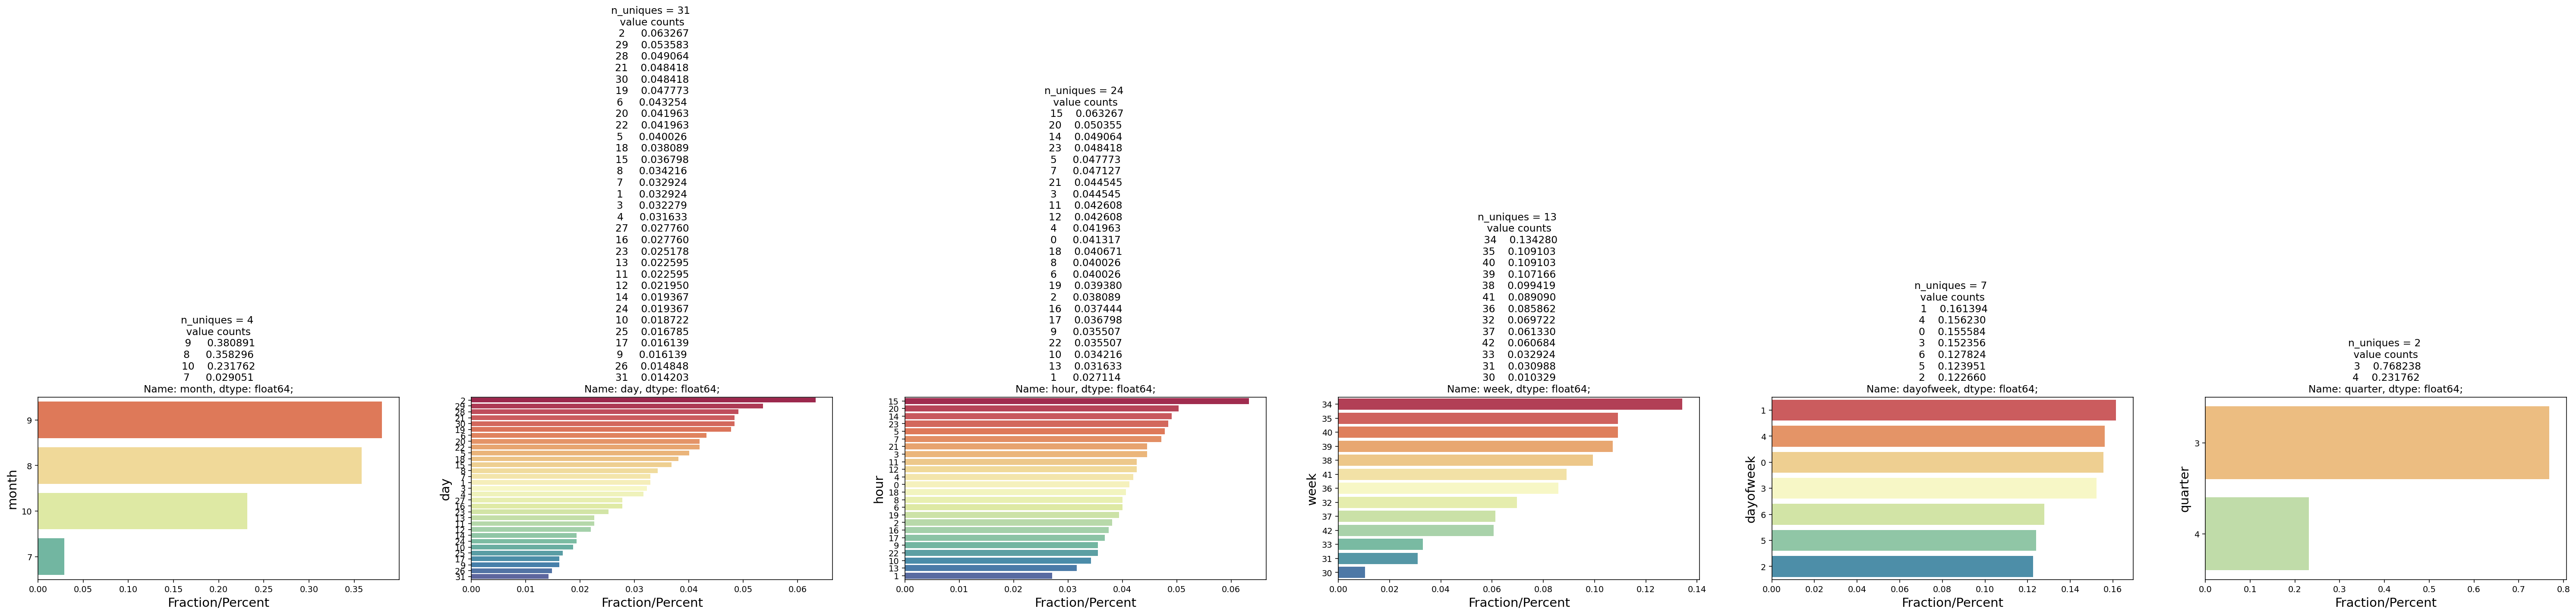

In [64]:
uva_cat(data_cat, cat_cols)

- As we can see from the graphs, most values are in the month of August and September.
- Second week begining for every month sees most of the values.
- As the company has an ongoing continuous process for production not much variablity can be seen on an hour basis.
- Most values week wise can be seen from before end of the year.
- Maximum values can be seen for Saturday.
- Also third quarter can be seen with most values.

-1    1449
 1     100
Name: col_Pass/Fail, dtype: int64


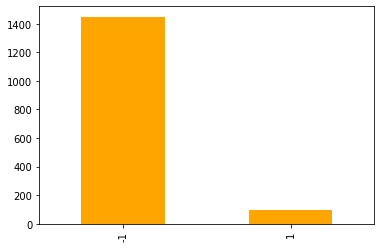

In [65]:
# Let's see the distribution of our target variable

print(t_data['col_Pass/Fail'].value_counts())
t_data['col_Pass/Fail'].value_counts().plot(kind = 'bar', color = 'orange');

- Here -1 is for pass and 1 for fail as per the given context.
- As we can see we have more pass values than fail.
- Hence, at a later stage we shall balance the distribution using sampling techniques.

- We shall do some hypothesis testing along with bivariate analysis now.
- Significane level is taken at default throughout.
- Null Hypothesis: The given variable doesn't impacts the target variable.
- Alternate Hypothesis: The given variable impacts the target variable.
- This process will help us filter out more variables from our data.

In [66]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  Takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test.
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [67]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  Takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test.
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [68]:
drop_cont_f = []

def bva_cont_cat(data, cont, cat, category):
    '''
    Takes data, two variables(one continuous and other categorical) and a class of the categorical data.\n
    Calculates the two sample t and z test.\n 
    Prints the result with bar and box plot.\n
    '''

    # Creating 2 samples
    x1 = data[cont][data[cat]==category][:]
    x2 = data[cont][~(data[cat]==category)][:]

    # Calculating descriptives
    n1, n2 = x1.shape[0], x2.shape[0]
    m1, m2 = x1.mean(), x2.mean()
    std1, std2 = x1.std(), x2.std()

    # Calculating p-values
    t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
    z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

    # Checking for variables which do not impact our target variable
    if (t_p_val > 0.05 and z_p_val > 0.05):
            drop_cont_f.append(cont)

    

In [69]:
cat_cols.append('col_Pass/Fail')

In [70]:
for i in t_data.drop(columns=cat_cols,axis=1).columns:
    bva_cont_cat(t_data, i, 'col_Pass/Fail', -1)

In [71]:
cat_cols.pop()

'col_Pass/Fail'

In [72]:
len(drop_cont_f)

147

After the statistical tests we can infer that the above 147 columns can be removed from our dataset and we shall do so in the following.

In [73]:
t_data.drop(columns=drop_cont_f,axis=1,inplace=True)

In [74]:
# Let's see the shape of the data after removal of features which are not of importance in influencing the target variable

t_data.shape

(1549, 44)

Now, let's try filtering out some ordinals

In [75]:
def bva_cat_cat(data, tar, cat):
  '''
  Takes data and two categorical variables.\n
  Calculates the chi2 significance between the two variables.\n 
  Prints the result with countplot and crosstab.\n
  '''
  # Isolating the variables
  data = data[[cat,tar]][:]

  # Forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  # Performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  # Checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  # Plotting grouped plot
  plt.figure(figsize = (5,4), dpi=100)
  sns.countplot(x=cat, hue=tar, data=data,palette='dark:salmon_r')
  plt.title("p-value = {}\n Is the difference significant ? = {}\n".format(round(p,8),sig))

  # Plotting percent stacked bar plot
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()  
  ax1.plot(kind='bar', stacked='True',title=str(ax1),figsize=(7,5),cmap='rocket')
  int_level = data[cat].value_counts()

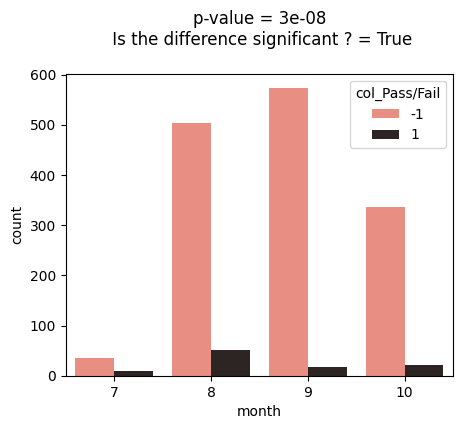

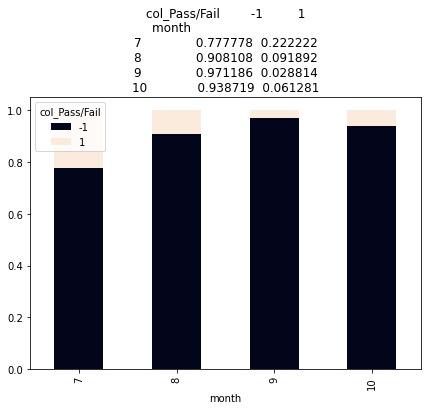

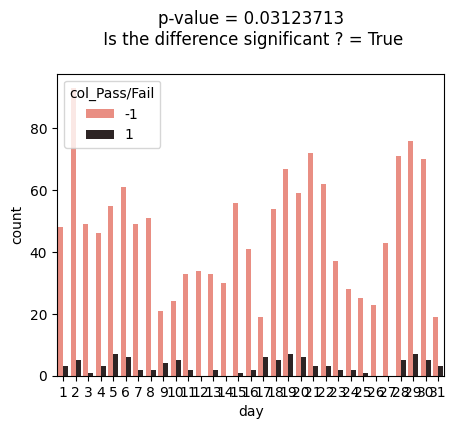

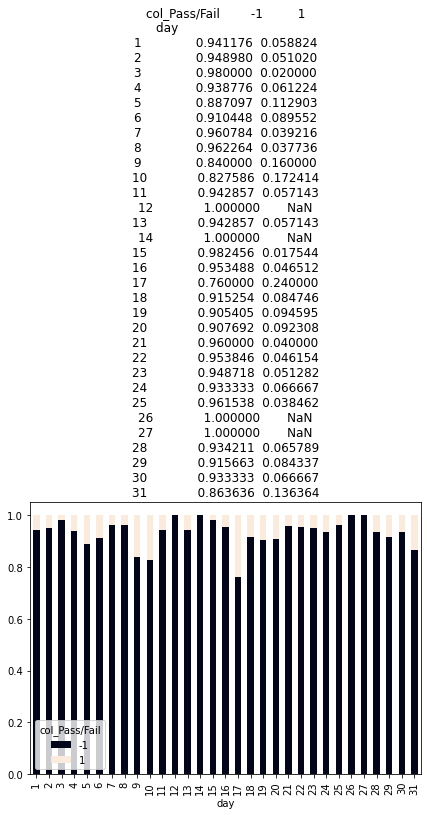

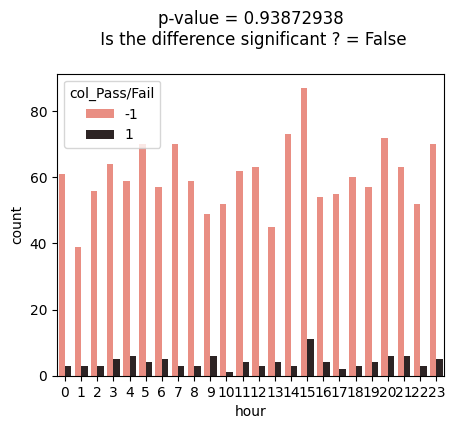

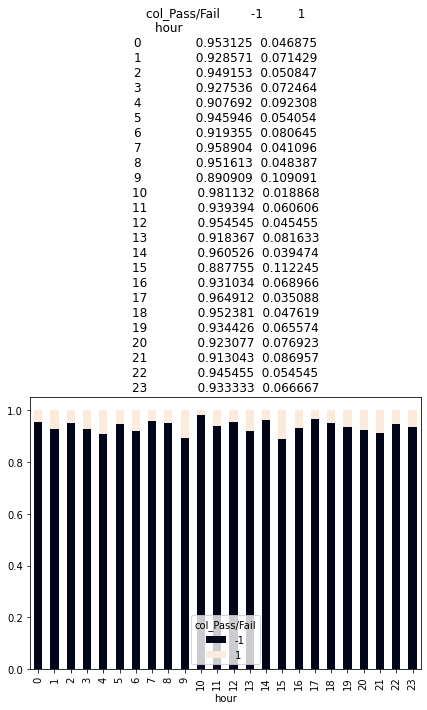

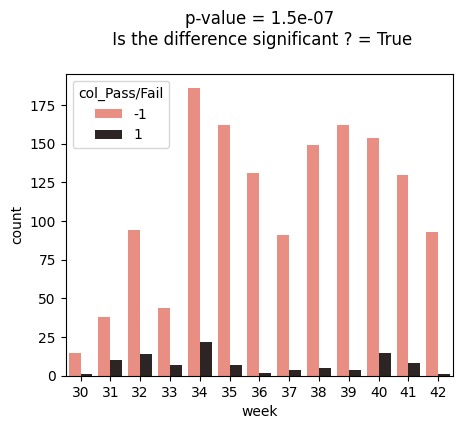

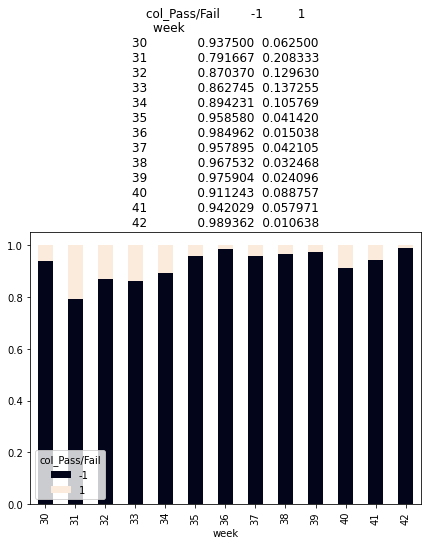

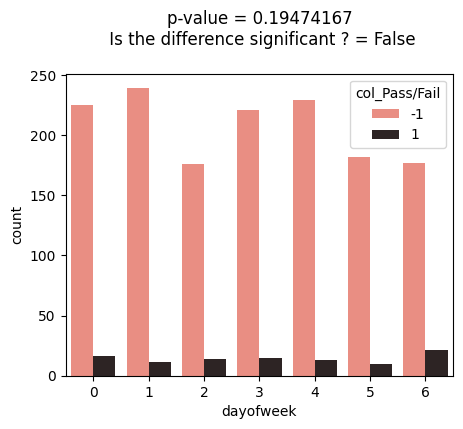

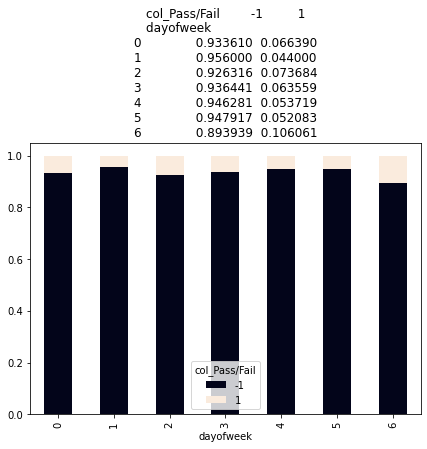

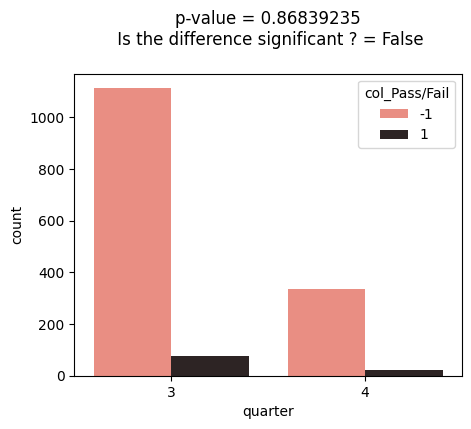

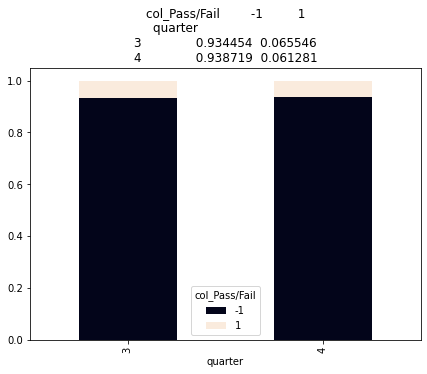

In [76]:
for i in cat_cols:
    bva_cat_cat(t_data,'col_Pass/Fail',i)

- We can see the categorical variables which are of importance to the target variable are month, day and week.
- So rest can be discarded.

In [77]:
cat_cols

['month', 'day', 'hour', 'week', 'dayofweek', 'quarter']

In [78]:
t_data.drop(columns=['hour', 'dayofweek', 'quarter'],axis=1,inplace=True)

In [79]:
# Let's check the shape of the data

t_data.shape

(1549, 41)

Now, that we have reduced the total number of variables let's visualize them to see their statistical properties 

In [80]:
# Function for numeric's analysis of each column passed as a list
# Min, Max, Range, Mean, Median, Standard Deviation, Skewness, Kurtosis

def uva_num(data, data_group):
  
  ''' 
  Univariate Analysis for Numeric:
  takes a group of variables (INTEGER and FLOAT) and plots all the descriptives and properties along with KDE.\n
  
  data : dataframe from which to plot from\n
  
  data_group : {list} type Group of Continuous variables\n

  '''  

  
  size = len(data_group)
  plt.figure(figsize = (8*size,3), dpi = 100)
  
  # Looping for each variable

  for j,i in enumerate(data_group):
    
    # Calculating descriptives of variable
    
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    
    # Calculating points of standard deviation
    
    points = mean-st_dev, mean+st_dev
    
    # Plotting with every information
    
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True,color ='black',alpha=0.5)
    sns.lineplot(points, [0,0], color = 'yellow', label = "std_dev",linewidth = 2.5)
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i))
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),
                                                                                                    round(points[1],2)),
                                                                                                    round(kurt,2),
                                                                                                    round(skew,2),
                                                                                                    (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                    round(mean,2),
                                                                                                    round(median,2)))


In [81]:
# Filtering categorical columns

cat_cols = ['month', 'day', 'week','col_Pass/Fail']

In [82]:
# Filtering numerical columns

num_cols = t_data.drop(columns=cat_cols,axis=1).columns.to_list()

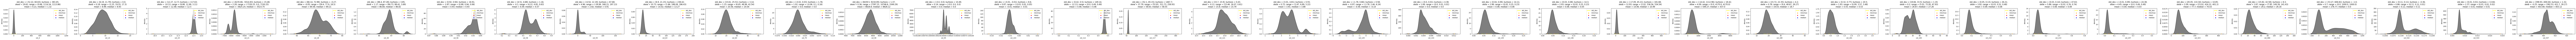

In [83]:
uva_num(t_data,num_cols)

- <b>Note: Please enlarge the graph to visualise better.</b>
- We can see from the above that the most of the distributions are moderately or highly positively or negatively skewed.
- With respect to kurtosis the most distributions are both leptokurtic and platykurtic with high values while few are close to the meskurtic nature.
- These values depicts quite many outliers in our data which we shall handle later.

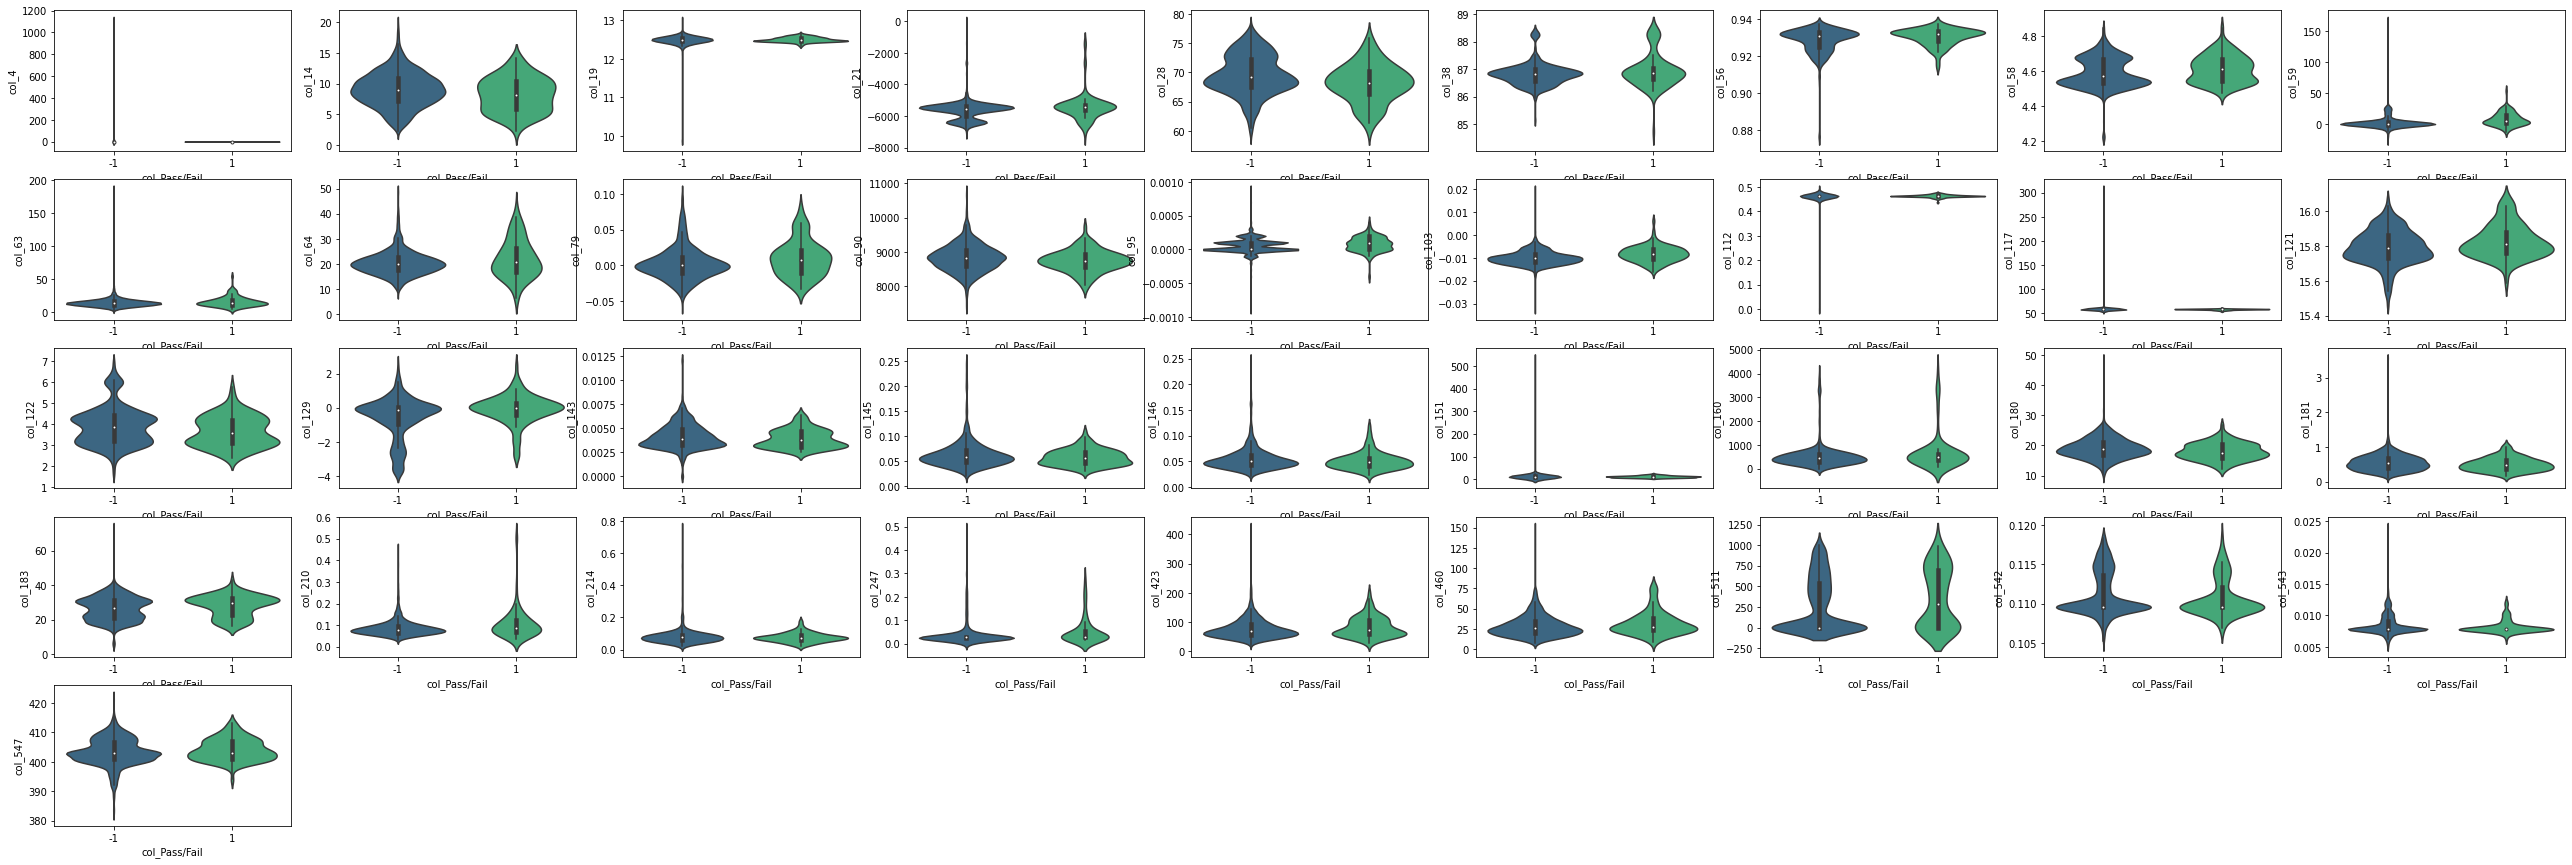

In [84]:
# Creating plot for each numerical variable after filtering

plt.figure(figsize=(45,15))
for i, j in enumerate(t_data[num_cols]):
    plt.subplot(5,9,i+1)
    sns.violinplot(x='col_Pass/Fail', y=j, data=t_data,palette='viridis')


Here we can visualize the ditribution of each continuous variable.

In [85]:
cat_cols.pop()

'col_Pass/Fail'

In [86]:
# Calculating correlation

corr = t_data[num_cols].corr()

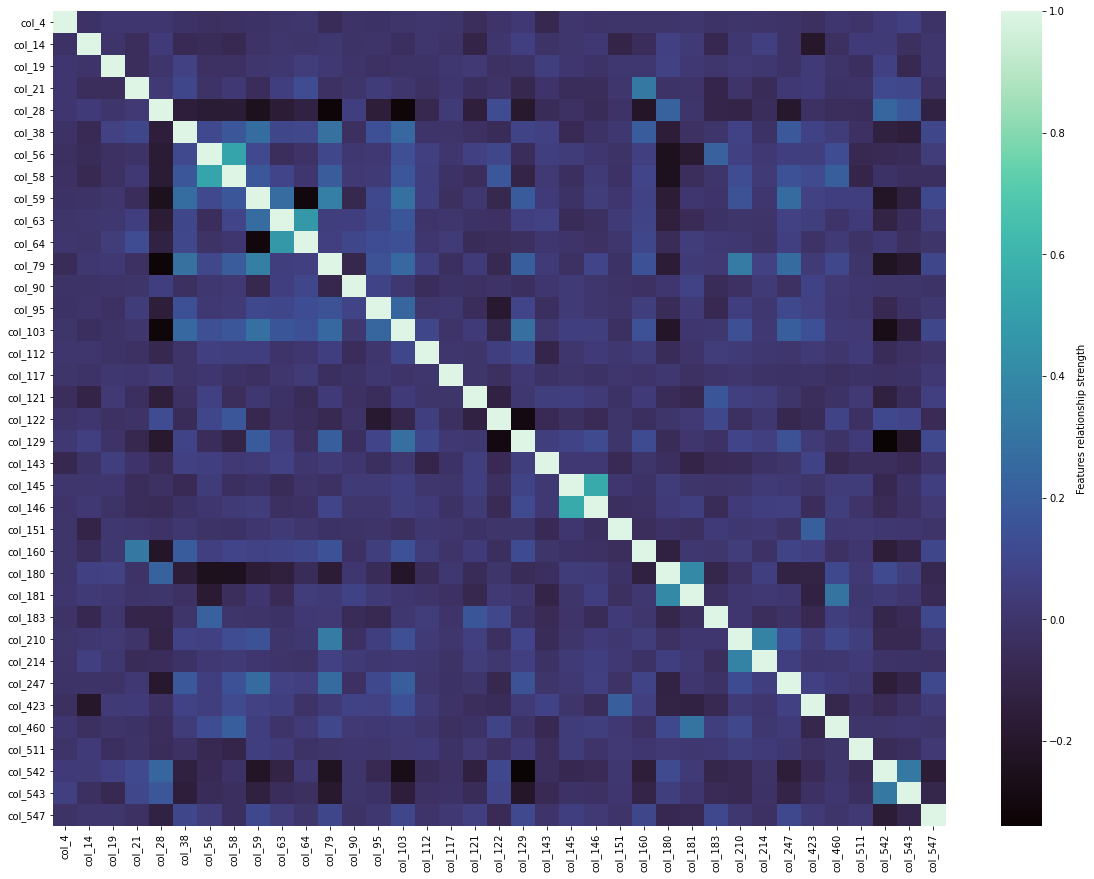

In [87]:
# Plotting the heatmap for the respective correlation

plt.figure(figsize=(20,15))

sns.heatmap(corr,annot=False,cbar_kws={'label': 'Features relationship strength'},cmap='mako');

As can be seen from the heat map above, we have removed multicollinearity between independent variables from our data.

So, let's continue with the t_data dataframe and see further what all optimizations can be done.

## 4. Data pre-processing: 

### <center>Segregate predictors vs target attributes 

### <center>Check for target balancing and fix it if found imbalanced

### <center>Perform train-test split and standardise the data or vice versa if required 

### <center>Check if the train and test data have similar statistical characteristics when compared with original data

Firstly, as we saw earlier, let's visualise the outliers and treat them accordingly.

In [88]:
# Custom function for outlier analysis

def uva_outlier(data, data_group, include_outlier = True):
  
  '''
  Univariate Analysis for Outlier:
  takes a group of variables (INTEGER and FLOAT) and plot boxplot and descriptives\n
  
  data : dataframe from which to plot from\n
  
  data_group : {list} type Group of Continuous variables\n
  
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(data_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  # Looping for each variable
  
  for j,i in enumerate(data_group):
    
    # Calculating the descriptives
    
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating number of outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      
      # Plotting with every information
      
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v",color='aqua')
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      
      # Replacing outliers with max/min whisker
      
      data2 = data[data_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # Plotting without outliers
        
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v",color='lightblue')
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

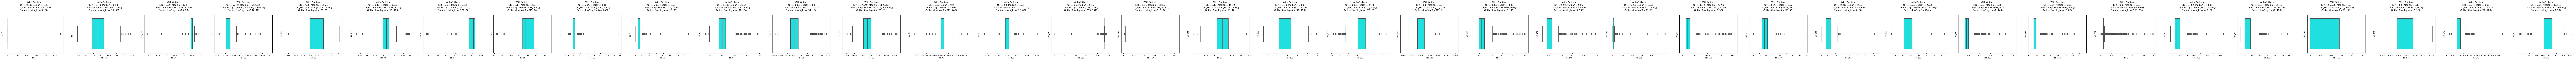

In [89]:
uva_outlier(t_data, num_cols)

In [90]:
# Replacing outliers with whisker values

for i in num_cols:
    t_data[i].quantile(0.25), t_data[i].quantile(0.75)
    IQR = t_data[i].quantile(0.75) - t_data[i].quantile(0.25)
    Q1 = t_data[i].quantile(0.25)
    Q3 = t_data[i].quantile(0.75)
    whisker_1 = Q1 - (1.5*IQR)
    whisker_2 = Q3 + (1.5*IQR)
    t_data[i].loc[t_data[i]>whisker_2] = whisker_2
    t_data[i].loc[t_data[i]<whisker_1] = whisker_1


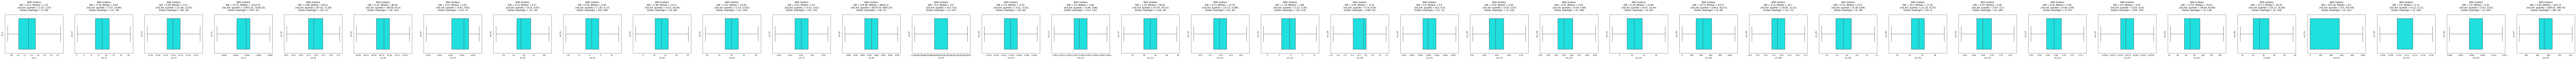

In [91]:
uva_outlier(t_data, num_cols)

In [92]:
# Let's see our data again

t_data.head()

,month,day,week,col_4,col_14,col_19,col_21,col_28,col_38,col_56,...,col_210,col_214,col_247,col_423,col_460,col_511,col_542,col_543,col_547,col_Pass/Fail
0,7,22,30,1.2043,8.4061,12.5222,-5575.25,66.2000,86.7217,0.9231,...,0.0622,0.0474,0.0268,62.9543,20.4401,0.0000,0.1096,0.0078,407.208,-1
1,7,22,30,1.5509,13.3419,12.5635,-5469.25,65.0778,86.6867,0.9141,...,0.1485,0.0811,0.0283,78.1223,23.2130,250.7463,0.1096,0.0078,406.394,-1
2,7,22,30,1.3168,11.9224,12.4761,-5441.00,67.2000,86.6078,0.9267,...,0.0955,0.0655,0.0268,46.2660,22.8688,0.0000,0.1096,0.0078,406.358,-1
3,7,23,30,1.2043,13.6262,12.4761,-5434.00,65.1667,86.7217,0.9267,...,0.0954,0.0873,0.0268,74.1514,31.3987,840.0000,0.1096,0.0078,410.246,-1
4,7,23,30,1.2043,15.4346,12.4761,-5310.25,66.3556,86.7217,0.9231,...,0.1077,0.0776,0.0268,96.9378,38.7618,781.3953,0.1096,0.0078,406.784,-1


In [93]:
# Let's create a copy of the above as we might need the original copy later for additional implementaions

my_data = t_data.copy()

In [94]:
my_data.head()

,month,day,week,col_4,col_14,col_19,col_21,col_28,col_38,col_56,...,col_210,col_214,col_247,col_423,col_460,col_511,col_542,col_543,col_547,col_Pass/Fail
0,7,22,30,1.2043,8.4061,12.5222,-5575.25,66.2000,86.7217,0.9231,...,0.0622,0.0474,0.0268,62.9543,20.4401,0.0000,0.1096,0.0078,407.208,-1
1,7,22,30,1.5509,13.3419,12.5635,-5469.25,65.0778,86.6867,0.9141,...,0.1485,0.0811,0.0283,78.1223,23.2130,250.7463,0.1096,0.0078,406.394,-1
2,7,22,30,1.3168,11.9224,12.4761,-5441.00,67.2000,86.6078,0.9267,...,0.0955,0.0655,0.0268,46.2660,22.8688,0.0000,0.1096,0.0078,406.358,-1
3,7,23,30,1.2043,13.6262,12.4761,-5434.00,65.1667,86.7217,0.9267,...,0.0954,0.0873,0.0268,74.1514,31.3987,840.0000,0.1096,0.0078,410.246,-1
4,7,23,30,1.2043,15.4346,12.4761,-5310.25,66.3556,86.7217,0.9231,...,0.1077,0.0776,0.0268,96.9378,38.7618,781.3953,0.1096,0.0078,406.784,-1


In [95]:
# Segregating predictors and target attribute

X = my_data.drop(labels= 'col_Pass/Fail' , axis = 1)
y = my_data['col_Pass/Fail']

In [96]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, stratify=y, test_size=0.3)

In [97]:
# Training data before oversampling

print(X_train.shape)
print(y_train.shape)

(1084, 40)
(1084,)


In [98]:
# Resampling the data
# Oversampling to avoid loss of data

smotenc=SMOTENC(categorical_features=[0,1,2],random_state=101)
X_train,y_train=smotenc.fit_resample(X_train,y_train)

In [99]:
# Training data after oversampling

print(X_train.shape)
print(y_train.shape)

(2028, 40)
(2028,)


In [100]:
# Testing data

print(X_test.shape)
print(y_test.shape)

(465, 40)
(465,)


In [101]:
# Allocation of classes in training data

print(Counter(y_train))

Counter({1: 1014, -1: 1014})


In [102]:
# Allocation of classes in testing data

print(Counter(y_test))

Counter({-1: 435, 1: 30})


In [103]:
# Statistical properties of original data

my_data.describe(include='all')

,month,day,week,col_4,col_14,col_19,col_21,col_28,col_38,col_56,...,col_210,col_214,col_247,col_423,col_460,col_511,col_542,col_543,col_547,col_Pass/Fail
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,...,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000
mean,8.815365,15.818593,36.855391,1.327599,8.979669,12.498727,-5654.787928,69.560179,86.811803,0.929124,...,0.085160,0.077810,0.027271,76.579327,28.780056,276.774912,0.111225,0.008367,403.515814,-0.870884
std,0.820126,9.382967,3.171824,0.375337,2.773091,0.070326,475.048693,3.418766,0.345350,0.005582,...,0.027064,0.027591,0.005531,28.384189,11.805020,330.041123,0.002746,0.001183,4.391245,0.491647
min,7.000000,1.000000,30.000000,0.681500,2.249300,12.329050,-6798.750000,60.138800,85.942150,0.914100,...,0.031900,0.019300,0.018650,23.020000,7.953400,0.000000,0.105300,0.006000,391.907000,-1.000000
25%,8.000000,7.000000,34.000000,1.017700,7.072800,12.460000,-5933.250000,67.422200,86.578300,0.925500,...,0.066000,0.057200,0.025100,56.039500,20.125400,0.000000,0.109600,0.007800,400.814000,-1.000000
50%,9.000000,17.000000,37.000000,1.316800,8.933650,12.499800,-5523.750000,69.211100,86.820700,0.931000,...,0.079800,0.075500,0.026800,70.026200,26.157050,0.000000,0.109600,0.007800,403.121000,-1.000000
75%,9.000000,23.000000,40.000000,1.525700,10.852500,12.547300,-5356.250000,72.277800,87.002400,0.933100,...,0.099000,0.093500,0.029400,93.063900,35.291800,555.555600,0.113500,0.009000,406.752000,-1.000000
max,10.000000,31.000000,42.000000,2.287700,16.522050,12.678250,-4490.750000,77.900000,87.638550,0.937800,...,0.148500,0.147950,0.035850,148.600500,58.041400,1000.000000,0.118400,0.010800,415.659000,1.000000


In [104]:
# Statistical properties of training data (Independent variables)

X_train.describe()

,month,day,week,col_4,col_14,col_19,col_21,col_28,col_38,col_56,...,col_183,col_210,col_214,col_247,col_423,col_460,col_511,col_542,col_543,col_547
count,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,...,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000
mean,8.677515,15.380671,36.343195,1.335735,8.689794,12.503855,-5581.287874,68.827494,86.841078,0.929962,...,27.365464,0.090832,0.076519,0.028732,78.894072,29.510265,307.083104,0.111044,0.008260,403.673476
std,0.883186,9.415690,3.372831,0.332294,2.542238,0.063098,444.653779,3.150762,0.354620,0.004813,...,5.968233,0.027574,0.024466,0.005247,26.881383,11.174632,341.994039,0.002387,0.001012,3.716395
min,7.000000,1.000000,30.000000,0.681500,2.249300,12.329050,-6798.750000,60.138800,85.942150,0.914100,...,5.426500,0.031900,0.019900,0.018650,23.020000,8.193300,0.000000,0.105300,0.006000,391.907000
25%,8.000000,6.000000,34.000000,1.118770,6.863440,12.467300,-5685.000000,66.974731,86.607865,0.927700,...,22.778987,0.068998,0.059479,0.026800,58.632825,21.792725,0.000000,0.109600,0.007800,400.821350
50%,8.000000,17.000000,36.000000,1.328758,8.718310,12.500493,-5488.072769,68.588900,86.836773,0.931500,...,28.583783,0.085900,0.075400,0.026800,72.884094,26.939776,114.253581,0.109600,0.007800,403.121000
75%,9.000000,22.000000,40.000000,1.504087,10.400248,12.547810,-5343.562500,70.569336,87.024557,0.933200,...,31.643906,0.110406,0.090303,0.034293,96.958353,35.730753,640.000000,0.112683,0.008652,406.294988
max,10.000000,31.000000,42.000000,2.287700,16.522050,12.678250,-4490.750000,77.900000,87.638550,0.937800,...,47.422500,0.148500,0.147950,0.035850,148.600500,58.041400,1000.000000,0.118400,0.010800,415.659000


In [105]:
# Statistical properties of training data (Dependent variable)

y_train.describe()

count    2028.000000
mean        0.000000
std         1.000247
min        -1.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: col_Pass/Fail, dtype: float64

In [106]:
# Statistical properties of testing data (Independent variables)

X_test.describe()

,month,day,week,col_4,col_14,col_19,col_21,col_28,col_38,col_56,...,col_183,col_210,col_214,col_247,col_423,col_460,col_511,col_542,col_543,col_547
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,...,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,8.812903,15.950538,36.858065,1.323427,8.873905,12.496105,-5680.339785,69.498292,86.818818,0.929143,...,26.815354,0.085417,0.077999,0.027331,75.850147,29.141595,286.894480,0.111224,0.008353,403.446241
std,0.807725,9.366331,3.167940,0.380080,2.667825,0.066578,492.548544,3.339327,0.333839,0.005642,...,6.595937,0.027650,0.028809,0.005539,27.471869,12.329227,327.218177,0.002802,0.001188,4.604715
min,7.000000,1.000000,30.000000,0.681500,2.817300,12.329050,-6798.750000,60.138800,85.999800,0.914100,...,6.189000,0.036400,0.019300,0.018650,29.327900,7.953400,0.000000,0.105800,0.006000,391.907000
25%,8.000000,7.000000,34.000000,1.003800,7.175800,12.461800,-6205.000000,67.466700,86.585000,0.925600,...,21.253000,0.066300,0.056900,0.024700,56.798400,19.939000,0.000000,0.109600,0.007800,400.814000
50%,9.000000,18.000000,37.000000,1.307600,8.869500,12.499000,-5528.500000,69.244400,86.826100,0.930800,...,27.655000,0.079800,0.075200,0.026800,70.175700,26.062600,46.347600,0.109600,0.007800,403.121000
75%,9.000000,23.000000,40.000000,1.529600,10.647500,12.539000,-5346.250000,72.188900,86.997700,0.933200,...,31.593000,0.096100,0.094900,0.029300,90.732200,35.925600,563.636400,0.113600,0.008900,406.760000
max,10.000000,31.000000,42.000000,2.287700,16.522050,12.678250,-4490.750000,77.088900,87.638550,0.937800,...,47.422500,0.148500,0.147950,0.035850,148.600500,58.041400,1000.000000,0.118400,0.010800,415.659000


In [107]:
# Statistical properties of testing data (Dependent variable)

y_test.describe()

count    465.000000
mean      -0.870968
std        0.491869
min       -1.000000
25%       -1.000000
50%       -1.000000
75%       -1.000000
max        1.000000
Name: col_Pass/Fail, dtype: float64

After seeing the statistical properties of training and testing data compared with original data, following inferences can be made :
- Training data has slightly different characteristics when compared to the original data.
- Testing data has almost same characteristics when compared to the original data.
- The reason being that, after we split the original data into training and test set we only perform oversampling only on training data as test data is an unknown entity used in production phase and shouldn't be tampered with.
- So training is data has a new representation while testing data is a similar representation of the original dataset.

In [108]:
# Will be used later

X_train_c = X_train.copy()
X_test_c = X_test.copy()

In [109]:
# Scaling the training data

X_train = X_train.apply(zscore)

In [110]:
# Scaling the testing data

X_test = X_test.apply(zscore)

Scaling the data after the train test split in order to prevent data leaks.

All the steps for Part 4 has been covered but in a different order for making pre-processing and explaination optimal. 

## 5. Model training, testing and tuning:

Model training: 
- Pick up a supervised learning model. 
- Train the model.  
- Use cross validation techniques.  
Hint: Use all CV techniques that you have learnt in the course. 
- Apply hyper-parameter tuning techniques to get the best accuracy.  
Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.  
- Use any other technique/method which can enhance the model performance. 
Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc. 
- Display and explain the classification report in detail. 
- Design a method of your own to check if the achieved train and test accuracies might change if a different sample population can lead to 
new train and test accuracies.  
Hint: You can use your concepts learnt under Applied Statistics module.  
- Apply the above steps for all possible models that you have learnt so far. 

In [111]:
# Lists to store accuracies and model name

train_accuracies = []
test_accuracies = []
model = []

**[ Random Forest ]** 

In [112]:
# Picking and instantiating the model

rf_clf = RandomForestClassifier()

In [113]:
# Training the model

rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [114]:
# Checking model's performance om training data

rf_clf.score(X_train,y_train)

1.0

In [115]:
# Checking model's performance om test data

rf_clf.score(X_test,y_test)

0.6537634408602151

Let's apply all the cross validation techniques learnt so far.

In [116]:
# Let's choose the number of folds for CV

num_folds_cv = 5

**K-fold CV**

In [117]:
# K-fold cross validation (without stratification)

kfold = KFold(n_splits=num_folds_cv)
kfold_results = cross_val_score(rf_clf,X_train, y_train, cv=kfold)
kfold_results

array([0.96305419, 0.95812808, 0.97536946, 0.99012346, 0.98765432])

In [118]:
# Let's see how good is our model

print('Mean of all the cross validated models is : ', kfold_results.mean())

Mean of all the cross validated models is :  0.9748659003831417


In [119]:
# Let's see how stable is our model

print('Standard devaition of the model based on cross validation', kfold_results.std())

Standard devaition of the model based on cross validation 0.012777022647980743


**LOOCV**

In [120]:
# Commenting out this code as it takes lots of time for being processed
# # LOOCV - Leave One Out Cross Validation

# scores = cross_val_score(rf_clf, X_train, y_train, cv=LeaveOneOut())
# scores

In [121]:
# # Let's see how good is our model

# print('Mean of all the cross validated models is : ', kfold_results.mean())

In [122]:
# # Let's see how stable is our model

# print('Standard devaition of the model based on cross validation', kfold_results.std())

**Stratified K-fold CV**

In [123]:
# Stratified k-fold cross validation

stratified_kfold = StratifiedKFold(n_splits = num_folds_cv)
stratified_kfold_results = cross_val_score(rf_clf, X_train, y_train, cv = stratified_kfold)
stratified_kfold_results

array([0.95812808, 0.97783251, 0.99261084, 0.99012346, 0.99506173])

In [124]:
# Let's see how good is our model

print('Mean of all the cross validated models is : ', kfold_results.mean())

Mean of all the cross validated models is :  0.9748659003831417


In [125]:
# Let's see how stable is our model

print('Standard devaition of the model based on cross validation', kfold_results.std())

Standard devaition of the model based on cross validation 0.012777022647980743


Let's now do some hyperparameter tuning to get better results

In [126]:
# Tuning the hyperparameters

parameters = {
                'max_depth': [15, 20, 45, 50],
                'max_features': ['auto', 'sqrt'],
                'min_samples_split': [5, 10],
                'n_estimators': [150, 200, 250, 300]
             }

random_grid = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=101),param_distributions=parameters, 
                          scoring='accuracy', verbose=1, n_jobs=-1,cv=5,random_state=101) 

random_grid_result = random_grid.fit(X_train, y_train)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.9822587119138844
Best Params:  {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 20}


In [127]:
rf_clf_ht = RandomForestClassifier(**random_grid_result.best_params_,random_state=101)

rf_clf_ht.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_split=5,
                       n_estimators=200, random_state=101)

In [128]:
rf_clf_ht.score(X_test,y_test)

0.6129032258064516

We can see that test accuracy dropped after tuning so let's try other methods.

In [129]:
# Fitting the PCA on the original data to find the optimal number of principal components

pca = PCA().fit(X_train)

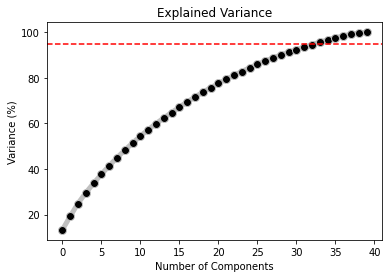

In [130]:
# Plotting the Cumulative Summation of the Explained Variance

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100,marker = 'o',color = 'silver',markerfacecolor='black', markersize=8,linewidth=5)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

# We want to preserve 95% of the variance so plot a horizontal line at 94% variance

plt.axhline(y=95, color='r', linestyle='--')
plt.show()

Text(0.5, 0, 'Principal Components')

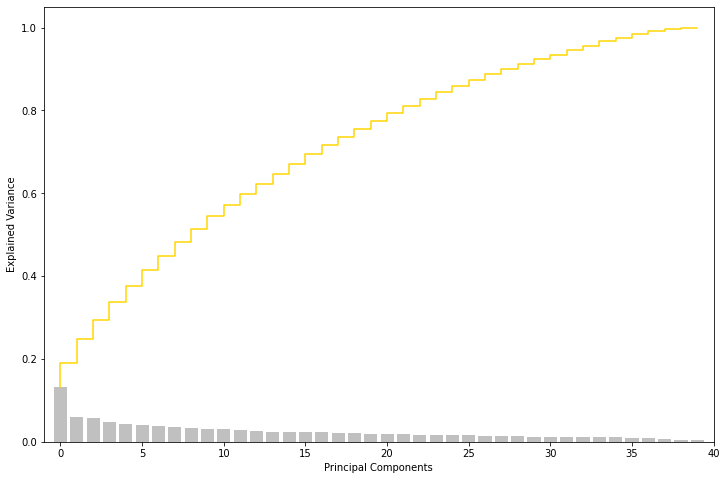

In [131]:
# Plotting the above in different form

plt.figure(figsize = (12, 8))
plt.step(range(40), np.cumsum(pca.explained_variance_ratio_),color='gold')
plt.bar(range(40), pca.explained_variance_ratio_,color='silver')
plt.xlim(-1, 40)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')

In [132]:
# Transforming the original train and test set to 34 components

# Fitting PCA on the training data

pca = PCA(34).fit(X_train)

# Transforming both training and test data

X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [133]:
# Checking the shape of data after PCA

X_train_transformed.shape

(2028, 34)

In [134]:
# Checking the shape of data after PCA

X_test_transformed.shape

(465, 34)

In [135]:
# Tuning the hyperparameters

parameters = {
                'max_depth': [15, 20, 45, 50, 60],
                'max_features': ['auto', 'sqrt'],
                'min_samples_split': [5,10],
                'n_estimators': [100,150, 200, 250, 300]
             }

random_grid = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=101),param_distributions=parameters, 
                          scoring='accuracy', verbose=1, n_jobs=-1,cv=5,random_state=101) 

random_grid_result = random_grid.fit(X_train_transformed, y_train)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.9753499969591923
Best Params:  {'n_estimators': 150, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}


In [136]:
rf_clf_ht_pca = RandomForestClassifier(**random_grid_result.best_params_,random_state=101)

rf_clf_ht_pca.fit(X_train_transformed,y_train)

RandomForestClassifier(max_depth=45, max_features='sqrt', min_samples_split=5,
                       n_estimators=150, random_state=101)

In [137]:
rf_clf_ht_pca.score(X_test_transformed,y_test)

0.886021505376344

In [138]:
# Predicting the response for testing data
# Then displaying the classification report

y_pred = rf_clf_ht_pca.predict(X_test_transformed)
print('Classification Report :\n')
print(classification_report(y_test, y_pred))

Classification Report :

              precision    recall  f1-score   support

          -1       0.95      0.93      0.94       435
           1       0.21      0.27      0.23        30

    accuracy                           0.89       465
   macro avg       0.58      0.60      0.59       465
weighted avg       0.90      0.89      0.89       465



- Overall accuracy is not of importance here as data is imbalanced.
- Getting low recall for class 1.
- Precision for class -1 is high.

In [139]:
train_accuracies.append(random_grid_result.best_score_)
test_accuracies.append(rf_clf_ht_pca.score(X_test_transformed, y_test))
model.append('Random Forest')

Let's check the respective accuracies for a new sample from the same data

In [140]:
# This function will be called everytime for each model being implemented for the project

def my_sample_test(model):
    """
    Function to test our model with a different sample population
    Input : Model
    """
    y_test.reset_index(drop='index',inplace=True)

    df_total_train = pd.concat([pd.DataFrame(X_train_transformed),y_train],axis=1)

    df_total_test = pd.concat([pd.DataFrame(X_test_transformed),y_test],axis=1)

    df_total = pd.concat([df_total_train,df_total_test],axis=0)

    df_total = df_total.sample(frac=0.7,random_state=42)

    # Segregating predictors and target attribute for training data
    sampleX = df_total.drop(labels= 'col_Pass/Fail' , axis = 1)
    sampley = df_total['col_Pass/Fail']

    # Splitting the data
    X_trains, X_tests, y_trains, y_tests = train_test_split(sampleX, sampley, random_state=42, stratify=sampley, test_size=0.3)

    # Let's create the sample list of accuracies from original and old model to perform the statistical test
    sample1 = [random_grid_result.best_score_,model.score(X_test_transformed, y_test)]
    sample2 = [model.score(X_trains,y_trains),model.score(X_tests,y_tests)]
    
    # Doing a paired t-test on the samples and printing the results 
    print(ttest_rel(sample1, sample2))

In [141]:
# Calling the function to test on the accuracies of new sample data from the population with respect to old/original

my_sample_test(rf_clf_ht_pca)

Ttest_relResult(statistic=-1.1333664001674297, pvalue=0.46025373660800517)


Since the p-value is greater than 0.05, we accept the null hypothesis and say that the samples are similar and hence our model feels stable.

**[ LightGBM ]**

In [142]:
# Picking and instantiating the model

lgb_clf = LGBMClassifier()

In [143]:
# Training the model

lgb_clf.fit(X_train, y_train)

LGBMClassifier()

In [144]:
# Checking model's performance om training data

lgb_clf.score(X_train,y_train)

1.0

In [145]:
# Checking model's performance om test data

lgb_clf.score(X_test,y_test)

0.44516129032258067

Let's apply all the cross validation techniques learnt so far.

In [146]:
# Let's choose the number of folds for CV

num_folds_cv = 5

**K-fold CV**

In [147]:
# K-fold cross validation (without stratification)

kfold = KFold(n_splits=num_folds_cv)
kfold_results = cross_val_score(lgb_clf,X_train, y_train, cv=kfold)
kfold_results

array([0.95320197, 0.96059113, 0.97783251, 0.99506173, 0.99753086])

In [148]:
# Let's see how good is our model

print('Mean of all the cross validated models is : ', kfold_results.mean())

Mean of all the cross validated models is :  0.9768436416712278


In [149]:
# Let's see how stable is our model

print('Standard devaition of the model based on cross validation', kfold_results.std())

Standard devaition of the model based on cross validation 0.01779837285414513


**LOOCV**

In [150]:
# Commenting out this code as it takes lots of time for being processed
# # LOOCV - Leave One Out Cross Validation

# scores = cross_val_score(lgb_clf, X_train, y_train, cv=LeaveOneOut())
# scores

In [151]:
# # Let's see how good is our model

# print('Mean of all the cross validated models is : ', kfold_results.mean())

In [152]:
# # Let's see how stable is our model

# print('Standard devaition of the model based on cross validation', kfold_results.std())

**Stratified K-fold CV**

In [153]:
# Stratified k-fold cross validation

stratified_kfold = StratifiedKFold(n_splits = num_folds_cv)
stratified_kfold_results = cross_val_score(lgb_clf, X_train, y_train, cv = stratified_kfold)
stratified_kfold_results

array([0.91871921, 0.98522167, 0.99014778, 0.99012346, 0.98024691])

In [154]:
# Let's see how good is our model

print('Mean of all the cross validated models is : ', kfold_results.mean())

Mean of all the cross validated models is :  0.9768436416712278


In [155]:
# Let's see how stable is our model

print('Standard devaition of the model based on cross validation', kfold_results.std())

Standard devaition of the model based on cross validation 0.01779837285414513


Let's now do some hyperparameter tuning to get better results

In [156]:
# Tuning the hyperparameters

parameters = {
             'num_leaves': sp_randint(10,100), 
             'min_child_samples': sp_randint(1, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
             }


random_grid = RandomizedSearchCV(estimator=LGBMClassifier(),param_distributions=parameters, 
                          scoring='accuracy', verbose=1, n_jobs=-1,cv=5,random_state=101) 

random_grid_result = random_grid.fit(X_train, y_train)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.9245867542419266
Best Params:  {'colsample_bytree': 0.6061789467355359, 'min_child_samples': 117, 'min_child_weight': 0.001, 'num_leaves': 85, 'reg_alpha': 2, 'reg_lambda': 100, 'subsample': 0.2777171838120125}


In [157]:
lgb_clf_ht = LGBMClassifier(**random_grid_result.best_params_,random_state=101)

lgb_clf_ht.fit(X_train,y_train)

LGBMClassifier(colsample_bytree=0.6061789467355359, min_child_samples=117,
               num_leaves=85, random_state=101, reg_alpha=2, reg_lambda=100,
               subsample=0.2777171838120125)

In [158]:
lgb_clf_ht.score(X_test,y_test)

0.20430107526881722

We can see that test accuracy dropped after tuning so let's try other methods.

In [159]:
# Fitting the PCA on the original data to find the optimal number of principal components

pca = PCA().fit(X_train)

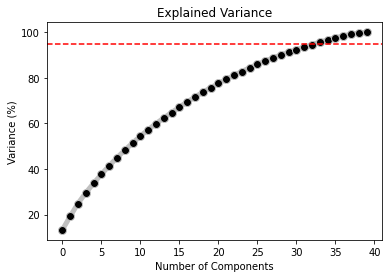

In [160]:
# Plotting the Cumulative Summation of the Explained Variance

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100,marker = 'o',color = 'silver',markerfacecolor='black', markersize=8,linewidth=5)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

# We want to preserve 95% of the variance so plot a horizontal line at 94% variance

plt.axhline(y=95, color='r', linestyle='--')
plt.show()

Text(0.5, 0, 'Principal Components')

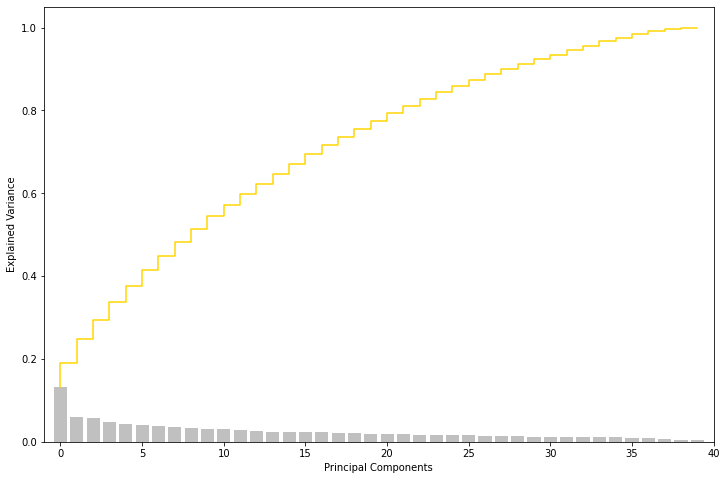

In [161]:
# Plotting the above in different form

plt.figure(figsize = (12, 8))
plt.step(range(40), np.cumsum(pca.explained_variance_ratio_),color='gold')
plt.bar(range(40), pca.explained_variance_ratio_,color='silver')
plt.xlim(-1, 40)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')

In [162]:
# Transforming the original train and test set to 34 components

# Fitting PCA on the training data

pca = PCA(34).fit(X_train)

# Transforming both training and test data

X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [163]:
# Checking the shape of data after PCA

X_train_transformed.shape

(2028, 34)

In [164]:
# Checking the shape of data after PCA

X_test_transformed.shape

(465, 34)

In [165]:
# Tuning the hyperparameters

parameters = {
             'num_leaves': sp_randint(10,100), 
             'min_child_samples': sp_randint(1, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
             }


random_grid = RandomizedSearchCV(estimator=LGBMClassifier(),param_distributions=parameters, 
                          scoring='accuracy', verbose=1, n_jobs=-1,cv=5,random_state=101) 

random_grid_result = random_grid.fit(X_train_transformed, y_train)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.8875813416043302
Best Params:  {'colsample_bytree': 0.6061789467355359, 'min_child_samples': 117, 'min_child_weight': 0.001, 'num_leaves': 85, 'reg_alpha': 2, 'reg_lambda': 100, 'subsample': 0.2777171838120125}


In [166]:
lgb_clf_ht_pca = LGBMClassifier(**random_grid_result.best_params_,random_state=101)

lgb_clf_ht_pca.fit(X_train_transformed,y_train)

LGBMClassifier(colsample_bytree=0.6061789467355359, min_child_samples=117,
               num_leaves=85, random_state=101, reg_alpha=2, reg_lambda=100,
               subsample=0.2777171838120125)

In [167]:
lgb_clf_ht_pca.score(X_test_transformed,y_test)

0.7462365591397849

In [168]:
# Predicting the response for testing data
# Then displaying the classification report

y_pred = lgb_clf_ht_pca.predict(X_test_transformed)
print('Classification Report :\n')
print(classification_report(y_test, y_pred))

Classification Report :

              precision    recall  f1-score   support

          -1       0.98      0.75      0.85       435
           1       0.17      0.73      0.27        30

    accuracy                           0.75       465
   macro avg       0.57      0.74      0.56       465
weighted avg       0.92      0.75      0.81       465



- Overall accuracy is not of importance here as data is imbalanced.
- Getting decent recall for class 1 and the value is quite improved.
- Precision for class -1 is high.

In [169]:
train_accuracies.append(random_grid_result.best_score_)
test_accuracies.append(lgb_clf_ht_pca.score(X_test_transformed, y_test))
model.append('Light GBM')

In [170]:
# Calling the function to test on the accuracies of new sample data from the population with respect to old/original

my_sample_test(lgb_clf_ht_pca)

Ttest_relResult(statistic=-1.4307819935199912, pvalue=0.3883379047834017)


Since the p-value is greater than 0.05, we accept the null hypothesis and say that the samples are similar and hence our model feels stable.

**[ AdaBoost]** 

In [171]:
# Picking and instantiating the model

ab_clf = AdaBoostClassifier()

In [172]:
# Training the model

ab_clf.fit(X_train, y_train)

AdaBoostClassifier()

In [173]:
# Checking model's performance om training data

ab_clf.score(X_train,y_train)

0.9541420118343196

In [174]:
# Checking model's performance om test data

ab_clf.score(X_test,y_test)

0.3311827956989247

Let's apply all the cross validation techniques learnt so far.

In [175]:
# Let's choose the number of folds for CV

num_folds_cv = 5

**K-fold CV**

In [176]:
# K-fold cross validation (without stratification)

kfold = KFold(n_splits=num_folds_cv)
kfold_results = cross_val_score(ab_clf,X_train, y_train, cv=kfold)
kfold_results

array([0.86699507, 0.84482759, 0.89408867, 0.94567901, 0.96296296])

In [177]:
# Let's see how good is our model

print('Mean of all the cross validated models is : ', kfold_results.mean())

Mean of all the cross validated models is :  0.9029106610715806


In [178]:
# Let's see how stable is our model

print('Standard devaition of the model based on cross validation', kfold_results.std())

Standard devaition of the model based on cross validation 0.04511498941308095


**LOOCV**

In [179]:
# Commenting out this code as it takes lots of time for being processed
# # LOOCV - Leave One Out Cross Validation

# scores = cross_val_score(ab_clf, X_train, y_train, cv=LeaveOneOut())
# scores

In [180]:
# # Let's see how good is our model

# print('Mean of all the cross validated models is : ', kfold_results.mean())

In [181]:
# # Let's see how stable is our model

# print('Standard devaition of the model based on cross validation', kfold_results.std())

**Stratified K-fold CV**

In [182]:
# Stratified k-fold cross validation

stratified_kfold = StratifiedKFold(n_splits = num_folds_cv)
stratified_kfold_results = cross_val_score(ab_clf, X_train, y_train, cv = stratified_kfold)
stratified_kfold_results

array([0.84975369, 0.9137931 , 0.93349754, 0.9382716 , 0.93333333])

In [183]:
# Let's see how good is our model

print('Mean of all the cross validated models is : ', kfold_results.mean())

Mean of all the cross validated models is :  0.9029106610715806


In [184]:
# Let's see how stable is our model

print('Standard devaition of the model based on cross validation', kfold_results.std())

Standard devaition of the model based on cross validation 0.04511498941308095


Let's now do some hyperparameter tuning to get better results

In [185]:
# Tuning the hyperparameters

parameters = {
              'n_estimators':[10,50,100,200,400,600,800,1000],
              'learning_rate':[0.01,0.1,0.2]
             }

random_grid = RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=101),param_distributions=parameters, 
                          scoring='accuracy', verbose=1, n_jobs=-1,cv=5,random_state=101) 

random_grid_result = random_grid.fit(X_train, y_train)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.9359216687952319
Best Params:  {'n_estimators': 800, 'learning_rate': 0.1}


In [186]:
ab_clf_ht = AdaBoostClassifier(**random_grid_result.best_params_,random_state=101)

ab_clf_ht.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=800, random_state=101)

In [187]:
ab_clf_ht.score(X_test,y_test)

0.3225806451612903

We can see that test accuracy dropped after tuning so let's try other methods.

In [188]:
# Fitting the PCA on the original data to find the optimal number of principal components

pca = PCA().fit(X_train)

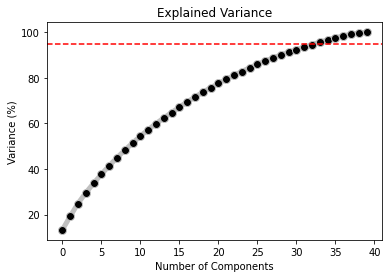

In [189]:
# Plotting the Cumulative Summation of the Explained Variance

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100,marker = 'o',color = 'silver',markerfacecolor='black', markersize=8,linewidth=5)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

# We want to preserve 95% of the variance so plot a horizontal line at 94% variance

plt.axhline(y=95, color='r', linestyle='--')
plt.show()

Text(0.5, 0, 'Principal Components')

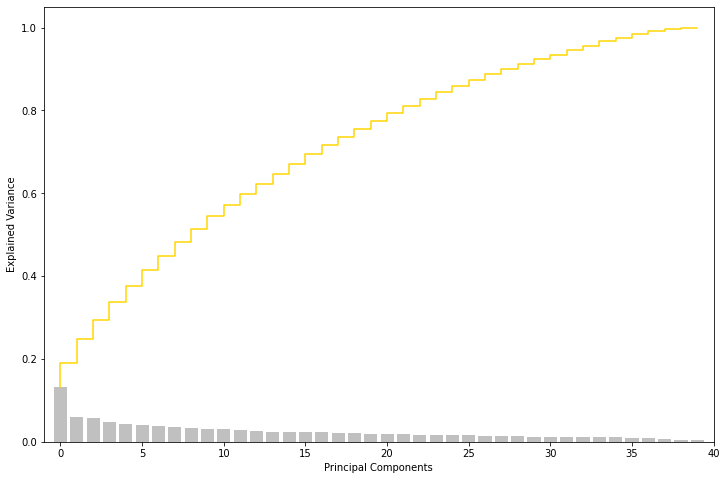

In [190]:
# Plotting the above in different form

plt.figure(figsize = (12, 8))
plt.step(range(40), np.cumsum(pca.explained_variance_ratio_),color='gold')
plt.bar(range(40), pca.explained_variance_ratio_,color='silver')
plt.xlim(-1, 40)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')

In [191]:
# Transforming the original train and test set to 34 components

# Fitting PCA on the training data

pca = PCA(34).fit(X_train)

# Transforming both training and test data

X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [192]:
# Checking the shape of data after PCA

X_train_transformed.shape

(2028, 34)

In [193]:
# Checking the shape of data after PCA

X_test_transformed.shape

(465, 34)

In [194]:
# Tuning the hyperparameters

parameters = {
              'n_estimators':[10,50,100,200,400,600,800,1000],
              'learning_rate':[0.01,0.1,0.2]
             }

random_grid = RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=101),param_distributions=parameters, 
                          scoring='accuracy', verbose=1, n_jobs=-1,cv=5,random_state=101) 

random_grid_result = random_grid.fit(X_train_transformed, y_train)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.9235759897828864
Best Params:  {'n_estimators': 600, 'learning_rate': 0.2}


In [195]:
ab_clf_ht_pca = AdaBoostClassifier(**random_grid_result.best_params_,random_state=101)

ab_clf_ht_pca.fit(X_train_transformed,y_train)

AdaBoostClassifier(learning_rate=0.2, n_estimators=600, random_state=101)

In [196]:
ab_clf_ht_pca.score(X_test_transformed,y_test)  

0.789247311827957

In [197]:
# Predicting the response for testing data
# Then displaying the classification report

y_pred = ab_clf_ht_pca.predict(X_test_transformed)
print('Classification Report :\n')
print(classification_report(y_test, y_pred))

Classification Report :

              precision    recall  f1-score   support

          -1       0.96      0.80      0.88       435
           1       0.17      0.57      0.26        30

    accuracy                           0.79       465
   macro avg       0.57      0.69      0.57       465
weighted avg       0.91      0.79      0.84       465



- Overall accuracy is not of importance here as data is imbalanced.
- Getting decent recall for class 1 relatively.
- Precision for class -1 is high.

In [198]:
train_accuracies.append(random_grid_result.best_score_)
test_accuracies.append(ab_clf_ht_pca.score(X_test_transformed, y_test))
model.append('AdaBoost')

In [199]:
# Calling the function to test on the accuracies of new sample data from the population with respect to old/original

my_sample_test(ab_clf_ht_pca)

Ttest_relResult(statistic=-1.5146749832232378, pvalue=0.3714788616721324)


Since the p-value is greater than 0.05, we accept the null hypothesis and say that the samples are similar and hence our model feels stable.

**[ GBM ]** 

In [200]:
# Picking and instantiating the model

gb_clf = GradientBoostingClassifier()

In [201]:
# Training the model

gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [202]:
# Checking model's performance om training data

gb_clf.score(X_train,y_train)

0.995069033530572

In [203]:
# Checking model's performance om test data

gb_clf.score(X_test,y_test)

0.2924731182795699

Let's apply all the cross validation techniques learnt so far.

In [204]:
# Let's choose the number of folds for CV

num_folds_cv = 5

**K-fold CV**

In [205]:
# K-fold cross validation (without stratification)

kfold = KFold(n_splits=num_folds_cv)
kfold_results = cross_val_score(gb_clf,X_train, y_train, cv=kfold)
kfold_results

array([0.908867  , 0.91133005, 0.95320197, 0.98518519, 0.99506173])

In [206]:
# Let's see how good is our model

print('Mean of all the cross validated models is : ', kfold_results.mean())

Mean of all the cross validated models is :  0.9507291856717144


In [207]:
# Let's see how stable is our model

print('Standard devaition of the model based on cross validation', kfold_results.std())

Standard devaition of the model based on cross validation 0.03595397019208997


**LOOCV**

In [208]:
# Commenting out this code as it takes lots of time for being processed
# # LOOCV - Leave One Out Cross Validation

# scores = cross_val_score(gb_clf, X_train, y_train, cv=LeaveOneOut())
# scores

In [209]:
# # Let's see how good is our model

# print('Mean of all the cross validated models is : ', kfold_results.mean())

In [210]:
# # Let's see how stable is our model

# print('Standard devaition of the model based on cross validation', kfold_results.std())

**Stratified K-fold CV**

In [211]:
# Stratified k-fold cross validation

stratified_kfold = StratifiedKFold(n_splits = num_folds_cv)
stratified_kfold_results = cross_val_score(gb_clf, X_train, y_train, cv = stratified_kfold)
stratified_kfold_results

array([0.89655172, 0.95566502, 0.97536946, 0.98024691, 0.97037037])

In [212]:
# Let's see how good is our model

print('Mean of all the cross validated models is : ', kfold_results.mean())

Mean of all the cross validated models is :  0.9507291856717144


In [213]:
# Let's see how stable is our model

print('Standard devaition of the model based on cross validation', kfold_results.std())

Standard devaition of the model based on cross validation 0.03595397019208997


Let's now do some hyperparameter tuning to get better results

In [214]:
# Tuning the hyperparameters

parameters = {
              'n_estimators':[400,600,800,1000],
              'learning_rate':[0.01,0.1,0.2,0.4,1],
#               'max_depth':[2,3,4,5,6,7],
#               'min_samples_split':[2,4,6,8,10,20,40,60,100], 
#               'min_samples_leaf':[1,3,5,7,9],
#               'max_features':[2,3,4,5,6,7],
#               'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]
             }

random_grid = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=101),param_distributions=parameters, 
                          scoring='accuracy', verbose=1, n_jobs=-1,cv=5,random_state=101) 

random_grid_result = random_grid.fit(X_train, y_train)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.9645174238277686
Best Params:  {'n_estimators': 800, 'learning_rate': 0.2}


In [215]:
gb_clf_ht = GradientBoostingClassifier(**random_grid_result.best_params_,random_state=101)

gb_clf_ht.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=800,
                           random_state=101)

In [216]:
gb_clf_ht.score(X_test,y_test)

0.4924731182795699

We can see that test accuracy improved but not so much after tuning so let's try other methods.

In [217]:
# Fitting the PCA on the original data to find the optimal number of principal components

pca = PCA().fit(X_train)

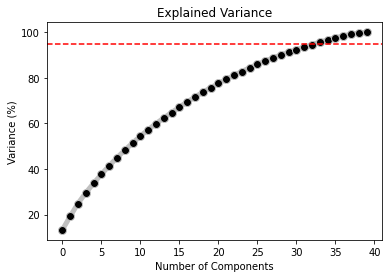

In [218]:
# Plotting the Cumulative Summation of the Explained Variance

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100,marker = 'o',color = 'silver',markerfacecolor='black', markersize=8,linewidth=5)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

# We want to preserve 95% of the variance so plot a horizontal line at 94% variance

plt.axhline(y=95, color='r', linestyle='--')
plt.show()

Text(0.5, 0, 'Principal Components')

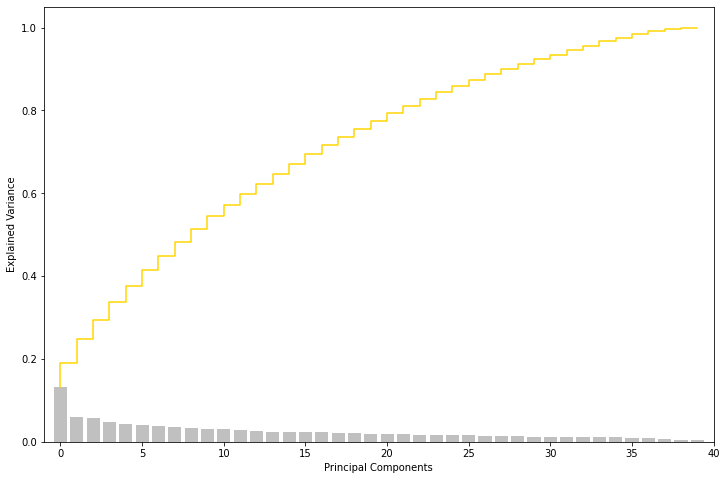

In [219]:
# Plotting the above in different form

plt.figure(figsize = (12, 8))
plt.step(range(40), np.cumsum(pca.explained_variance_ratio_),color='gold')
plt.bar(range(40), pca.explained_variance_ratio_,color='silver')
plt.xlim(-1, 40)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')

In [220]:
# Transforming the original train and test set to 34 components

# Fitting PCA on the training data

pca = PCA(34).fit(X_train)

# Transforming both training and test data

X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [221]:
# Checking the shape of data after PCA

X_train_transformed.shape

(2028, 34)

In [222]:
# Checking the shape of data after PCA

X_test_transformed.shape

(465, 34)

In [223]:
# Tuning the hyperparameters

parameters = {
              'n_estimators':[400,600,800,1000],
              'learning_rate':[0.01,0.1,0.2,0.4,1],
#               'max_depth':[2,3,4,5,6,7],
#               'min_samples_split':[2,4,6,8,10,20,40,60,100], 
#               'min_samples_leaf':[1,3,5,7,9],
#               'max_features':[2,3,4,5,6,7],
#               'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]
             }

random_grid = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=101),param_distributions=parameters, 
                          scoring='accuracy', verbose=1, n_jobs=-1,cv=5,random_state=101) 

random_grid_result = random_grid.fit(X_train_transformed, y_train)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.9679535364592835
Best Params:  {'n_estimators': 1000, 'learning_rate': 0.1}


In [224]:
gb_clf_ht_pca = GradientBoostingClassifier(**random_grid_result.best_params_,random_state=101)

gb_clf_ht_pca.fit(X_train_transformed,y_train)

GradientBoostingClassifier(n_estimators=1000, random_state=101)

In [225]:
gb_clf_ht_pca.score(X_test_transformed,y_test)

0.832258064516129

In [226]:
# Predicting the response for testing data
# Then displaying the classification report

y_pred = gb_clf_ht_pca.predict(X_test_transformed)
print('Classification Report :\n')
print(classification_report(y_test, y_pred))

Classification Report :

              precision    recall  f1-score   support

          -1       0.95      0.86      0.91       435
           1       0.16      0.37      0.22        30

    accuracy                           0.83       465
   macro avg       0.55      0.62      0.56       465
weighted avg       0.90      0.83      0.86       465



- Overall accuracy is not of importance here as data is imbalanced.
- Getting low recall for class 1 relatively.
- Precision for class -1 is high.

In [227]:
train_accuracies.append(random_grid_result.best_score_)
test_accuracies.append(gb_clf_ht_pca.score(X_test_transformed, y_test))
model.append('GBM')

In [228]:
# Calling the function to test on the accuracies of new sample data from the population with respect to old/original

my_sample_test(gb_clf_ht_pca)

Ttest_relResult(statistic=-1.0793819254798396, pvalue=0.4757083708651654)


Since the p-value is greater than 0.05, we accept the null hypothesis and say that the samples are similar and hence our model feels stable.

**[ XGBM ]** 

In [229]:
# Picking and instantiating the model

xgb_clf = XGBClassifier()

In [230]:
# Training the model

xgb_clf.fit(X_train, y_train)

[21:37:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [231]:
# Checking model's performance om training data

xgb_clf.score(X_train,y_train)

1.0

In [232]:
# Checking model's performance om test data

xgb_clf.score(X_test,y_test)

0.4258064516129032

Let's apply all the cross validation techniques learnt so far.

In [233]:
# Let's choose the number of folds for CV

num_folds_cv = 5

**K-fold CV**

In [234]:
# K-fold cross validation (without stratification)

kfold = KFold(n_splits=num_folds_cv)
kfold_results = cross_val_score(xgb_clf,X_train, y_train, cv=kfold)
kfold_results

[21:37:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

array([0.95073892, 0.95073892, 0.96305419, 0.99506173, 0.99753086])

In [235]:
# Let's see how good is our model

print('Mean of all the cross validated models is : ', kfold_results.mean())

Mean of all the cross validated models is :  0.9714249224594053


In [236]:
# Let's see how stable is our model

print('Standard devaition of the model based on cross validation', kfold_results.std())

Standard devaition of the model based on cross validation 0.020813984256124046


**LOOCV**

In [237]:
# Commenting out this code as it takes lots of time for being processed
# # LOOCV - Leave One Out Cross Validation

# scores = cross_val_score(xgb_clf, X_train, y_train, cv=LeaveOneOut())
# scores

In [238]:
# # Let's see how good is our model

# print('Mean of all the cross validated models is : ', kfold_results.mean())

In [239]:
# # Let's see how stable is our model

# print('Standard devaition of the model based on cross validation', kfold_results.std())

**Stratified K-fold CV**

In [240]:
# Stratified k-fold cross validation

stratified_kfold = StratifiedKFold(n_splits = num_folds_cv)
stratified_kfold_results = cross_val_score(xgb_clf, X_train, y_train, cv = stratified_kfold)
stratified_kfold_results

[21:37:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

array([0.92610837, 0.98522167, 0.99014778, 0.99259259, 0.97283951])

In [241]:
# Let's see how good is our model

print('Mean of all the cross validated models is : ', kfold_results.mean())

Mean of all the cross validated models is :  0.9714249224594053


In [242]:
# Let's see how stable is our model

print('Standard devaition of the model based on cross validation', kfold_results.std())

Standard devaition of the model based on cross validation 0.020813984256124046


Let's now do some hyperparameter tuning to get better results

In [243]:
# Tuning the hyperparameters

param_grid={
            'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3,1],
            'max_depth':[3,5,7,9,11,13],
            'min_child_weight':[1,3,5,7],
            'colsample_bytree':[0.2,0.3,0.4,0.5,0.6,0.7],
            'gamma':[0.0,0.1,0.2,0.3,0.4,0.5]
            }


random_grid=RandomizedSearchCV(estimator=XGBClassifier(eval_metric='mlogloss'),param_distributions=param_grid,random_state=101,scoring = "accuracy", 
                                     n_jobs=1,verbose=1)


random_grid_result = random_grid.fit(X_train, y_train)


print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.9694447485252082
Best Params:  {'min_child_weight': 3, 'max_depth': 11, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.3}


In [244]:
xgb_clf_ht = XGBClassifier(**random_grid_result.best_params_,random_state=101)

xgb_clf_ht.fit(X_train,y_train)

[21:37:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=11,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [245]:
xgb_clf_ht.score(X_test,y_test)

0.3053763440860215

We can see that test accuracy dropped after tuning so let's try other methods.

In [246]:
# Fitting the PCA on the original data to find the optimal number of principal components

pca = PCA().fit(X_train)

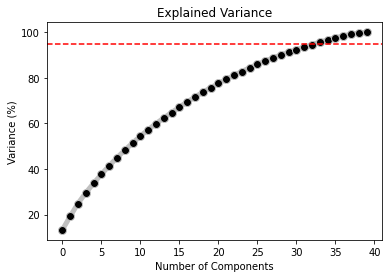

In [247]:
# Plotting the Cumulative Summation of the Explained Variance

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100,marker = 'o',color = 'silver',markerfacecolor='black', markersize=8,linewidth=5)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

# We want to preserve 95% of the variance so plot a horizontal line at 94% variance

plt.axhline(y=95, color='r', linestyle='--')
plt.show()

Text(0.5, 0, 'Principal Components')

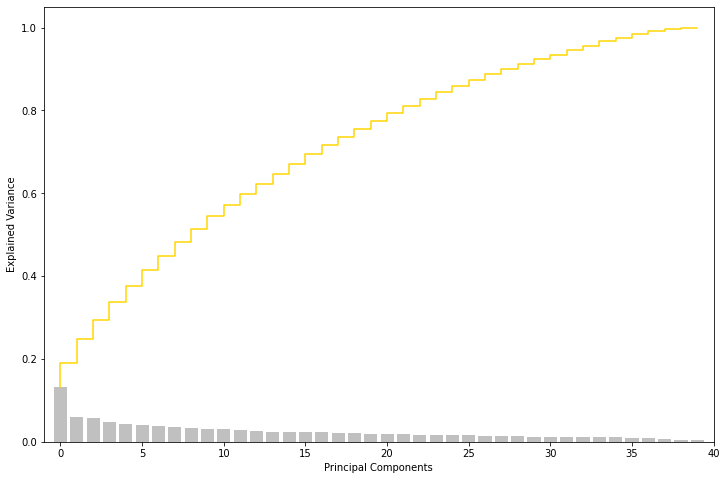

In [248]:
# Plotting the above in different form

plt.figure(figsize = (12, 8))
plt.step(range(40), np.cumsum(pca.explained_variance_ratio_),color='gold')
plt.bar(range(40), pca.explained_variance_ratio_,color='silver')
plt.xlim(-1, 40)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')

In [249]:
# Transforming the original train and test set to 34 components

# Fitting PCA on the training data

pca = PCA(34).fit(X_train)

# Transforming both training and test data

X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [250]:
# Checking the shape of data after PCA

X_train_transformed.shape

(2028, 34)

In [251]:
# Checking the shape of data after PCA

X_test_transformed.shape

(465, 34)

In [252]:
# Tuning the hyperparameters

param_grid={
            'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3,1],
            'max_depth':[3,5,7,9,11,13],
            'min_child_weight':[1,3,5,7],
            'colsample_bytree':[0.2,0.3,0.4,0.5,0.6,0.7],
            'gamma':[0.0,0.1,0.2,0.3,0.4,0.5]
            }


random_grid=RandomizedSearchCV(estimator=XGBClassifier(eval_metric='mlogloss'),param_distributions=param_grid,random_state=101,scoring = "accuracy", 
                                     n_jobs=1,verbose=1)


random_grid_result = random_grid.fit(X_train_transformed, y_train)


print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.9728893754181112
Best Params:  {'min_child_weight': 3, 'max_depth': 11, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.3}


In [253]:
xgb_clf_ht_pca = XGBClassifier(**random_grid_result.best_params_,random_state=101)

xgb_clf_ht_pca.fit(X_train_transformed,y_train)

[21:37:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=11,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [254]:
xgb_clf_ht_pca.score(X_test_transformed,y_test)

0.8817204301075269

In [255]:
# Predicting the response for testing data
# Then displaying the classification report

y_pred = xgb_clf_ht_pca.predict(X_test_transformed)
print('Classification Report :\n')
print(classification_report(y_test, y_pred))

Classification Report :

              precision    recall  f1-score   support

          -1       0.96      0.91      0.94       435
           1       0.26      0.47      0.34        30

    accuracy                           0.88       465
   macro avg       0.61      0.69      0.64       465
weighted avg       0.92      0.88      0.90       465



- Overall accuracy is not of importance here as data is imbalanced.
- Getting low recall for class 1 relatively.
- Precision for class -1 is high.

In [256]:
train_accuracies.append(random_grid_result.best_score_)
test_accuracies.append(xgb_clf_ht_pca.score(X_test_transformed, y_test))
model.append('XGBM')

In [257]:
# Calling the function to test on the accuracies of new sample data from the population with respect to old/original

my_sample_test(xgb_clf_ht_pca)

Ttest_relResult(statistic=-1.1196883779863966, pvalue=0.4640913425752206)


Since the p-value is greater than 0.05, we accept the null hypothesis and say that the samples are similar and hence our model feels stable.

**[ Logistic Regression ]** 

In [258]:
# Picking and instantiating the model

lr_clf = LogisticRegression()

In [259]:
# Training the model

lr_clf.fit(X_train, y_train)

LogisticRegression()

In [260]:
# Checking model's performance om training data

lr_clf.score(X_train,y_train)

0.8476331360946746

In [261]:
# Checking model's performance om test data

lr_clf.score(X_test,y_test)

0.5806451612903226

Let's apply all the cross validation techniques learnt so far.

In [262]:
# Let's choose the number of folds for CV

num_folds_cv = 5

**K-fold CV**

In [263]:
# K-fold cross validation (without stratification)

kfold = KFold(n_splits=num_folds_cv)
kfold_results = cross_val_score(lr_clf,X_train, y_train, cv=kfold)
kfold_results

array([0.74876847, 0.75123153, 0.86699507, 0.79506173, 0.75308642])

In [264]:
# Let's see how good is our model

print('Mean of all the cross validated models is : ', kfold_results.mean())

Mean of all the cross validated models is :  0.7830286444079547


In [265]:
# Let's see how stable is our model

print('Standard devaition of the model based on cross validation', kfold_results.std())

Standard devaition of the model based on cross validation 0.0453354369750164


**LOOCV**

In [266]:
# Commenting out this code as it takes lots of time for being processed
# # LOOCV - Leave One Out Cross Validation

# scores = cross_val_score(lr_clf, X_train, y_train, cv=LeaveOneOut())
# scores

In [267]:
# # Let's see how good is our model

# print('Mean of all the cross validated models is : ', kfold_results.mean())

In [268]:
# # Let's see how stable is our model

# print('Standard devaition of the model based on cross validation', kfold_results.std())

**Stratified K-fold CV**

In [269]:
# Stratified k-fold cross validation

stratified_kfold = StratifiedKFold(n_splits = num_folds_cv)
stratified_kfold_results = cross_val_score(lr_clf, X_train, y_train, cv = stratified_kfold)
stratified_kfold_results

array([0.83990148, 0.81773399, 0.85221675, 0.86419753, 0.8345679 ])

In [270]:
# Let's see how good is our model

print('Mean of all the cross validated models is : ', kfold_results.mean())

Mean of all the cross validated models is :  0.7830286444079547


In [271]:
# Let's see how stable is our model

print('Standard devaition of the model based on cross validation', kfold_results.std())

Standard devaition of the model based on cross validation 0.0453354369750164


Let's now do some hyperparameter tuning to get better results

In [272]:
# Tuning the hyperparameters

penalty = ['l1', 'l2']

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

class_weight = [{1:0.5, -1:0.5}, {1:0.4, -1:0.6}, {1:0.6, -1:0.4}, {1:0.7, -1:0.3}] 

solver = ['liblinear', 'saga'] 

param_grid = dict(penalty=penalty, C=C, class_weight=class_weight, solver=solver)

logistic = LogisticRegression()

random_grid = GridSearchCV(estimator=logistic, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1) 

random_grid_result = random_grid.fit(X_train, y_train)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Score:  0.8441963145411421
Best Params:  {'C': 0.1, 'class_weight': {1: 0.6, -1: 0.4}, 'penalty': 'l2', 'solver': 'liblinear'}


In [273]:
lr_clf_ht = LogisticRegression(**random_grid_result.best_params_,random_state=101)

lr_clf_ht.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight={-1: 0.4, 1: 0.6}, random_state=101,
                   solver='liblinear')

In [274]:
lr_clf_ht.score(X_test,y_test)

0.513978494623656

We can see that test accuracy dropped after tuning so let's try other methods.

In [275]:
# Fitting the PCA on the original data to find the optimal number of principal components

pca = PCA().fit(X_train)

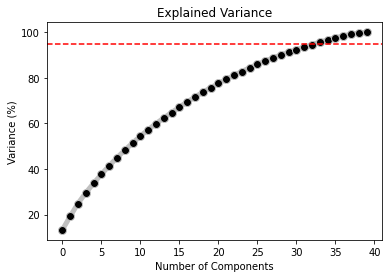

In [276]:
# Plotting the Cumulative Summation of the Explained Variance

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100,marker = 'o',color = 'silver',markerfacecolor='black', markersize=8,linewidth=5)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

# We want to preserve 95% of the variance so plot a horizontal line at 94% variance

plt.axhline(y=95, color='r', linestyle='--')
plt.show()

Text(0.5, 0, 'Principal Components')

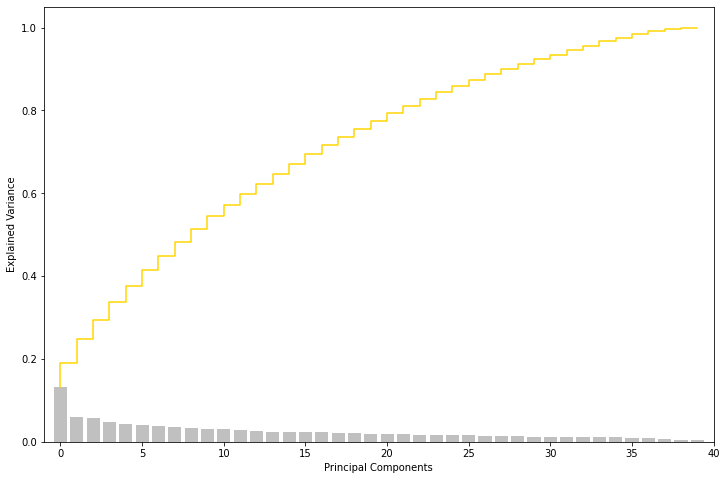

In [277]:
# Plotting the above in different form

plt.figure(figsize = (12, 8))
plt.step(range(40), np.cumsum(pca.explained_variance_ratio_),color='gold')
plt.bar(range(40), pca.explained_variance_ratio_,color='silver')
plt.xlim(-1, 40)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')

In [278]:
# Transforming the original train and test set to 37 components

# Fitting PCA on the training data

pca = PCA(34).fit(X_train)

# Transforming both training and test data

X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [279]:
# Checking the shape of data after PCA

X_train_transformed.shape

(2028, 34)

In [280]:
# Checking the shape of data after PCA

X_test_transformed.shape

(465, 34)

In [281]:
# Tuning the hyperparameters

penalty = ['l1', 'l2']

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

class_weight = [{1:0.5, -1:0.5}, {1:0.4, -1:0.6}, {1:0.6, -1:0.4}, {1:0.7, -1:0.3}] 

solver = ['liblinear', 'saga'] 

param_grid = dict(penalty=penalty, C=C, class_weight=class_weight, solver=solver)

logistic = LogisticRegression()

random_grid = GridSearchCV(estimator=logistic, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1) 

random_grid_result = random_grid.fit(X_train_transformed, y_train)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Score:  0.8234823329076203
Best Params:  {'C': 0.1, 'class_weight': {1: 0.5, -1: 0.5}, 'penalty': 'l2', 'solver': 'liblinear'}


In [282]:
lr_clf_ht_pca = LogisticRegression(**random_grid_result.best_params_,random_state=101)

lr_clf_ht_pca.fit(X_train_transformed,y_train)

LogisticRegression(C=0.1, class_weight={-1: 0.5, 1: 0.5}, random_state=101,
                   solver='liblinear')

In [283]:
lr_clf_ht_pca.score(X_test_transformed,y_test)

0.5763440860215053

In [284]:
# Predicting the response for testing data
# Then displaying the classification report

y_pred = lr_clf_ht_pca.predict(X_test_transformed)
print('Classification Report :\n')
print(classification_report(y_test, y_pred))

Classification Report :

              precision    recall  f1-score   support

          -1       0.98      0.56      0.71       435
           1       0.11      0.80      0.20        30

    accuracy                           0.58       465
   macro avg       0.54      0.68      0.45       465
weighted avg       0.92      0.58      0.68       465



- Overall accuracy is not of importance here as data is imbalanced.
- Getting good recall for class 1 relatively here and one of the highest.
- Precision for class -1 is high.

In [285]:
train_accuracies.append(random_grid_result.best_score_)
test_accuracies.append(lr_clf_ht_pca.score(X_test_transformed, y_test))
model.append('Logistic Regression')

In [286]:
# Calling the function to test on the accuracies of new sample data from the population with respect to old/original

my_sample_test(lr_clf_ht_pca)

Ttest_relResult(statistic=-0.6669297932422101, pvalue=0.6255499609054512)


Since the p-value is greater than 0.05, we accept the null hypothesis and say that the samples are similar and hence our model feels stable.

**[ Gaussian NB ]** 

In [287]:
# Picking and instantiating the model

gnb_clf = GaussianNB()

In [288]:
# Training the model

gnb_clf.fit(X_train, y_train)

GaussianNB()

In [289]:
# Checking model's performance om training data

gnb_clf.score(X_train,y_train)

0.7998027613412229

In [290]:
# Checking model's performance om test data

gnb_clf.score(X_test,y_test)

0.6129032258064516

Let's apply all the cross validation techniques learnt so far.

In [291]:
# Let's choose the number of folds for CV

num_folds_cv = 5

In [292]:
# K-fold cross validation (without stratification)

kfold = KFold(n_splits=num_folds_cv)
kfold_results = cross_val_score(gnb_clf,X_train, y_train, cv=kfold)
kfold_results

array([0.77832512, 0.72906404, 0.78817734, 0.80246914, 0.79506173])

In [293]:
# Let's see how good is our model

print('Mean of all the cross validated models is : ', kfold_results.mean())

Mean of all the cross validated models is :  0.778619473332117


In [294]:
# Let's see how stable is our model

print('Standard devaition of the model based on cross validation', kfold_results.std())

Standard devaition of the model based on cross validation 0.02602435258834339


**LOOCV**

In [295]:
# Commenting out this code as it takes lots of time for being processed
# # LOOCV - Leave One Out Cross Validation

# scores = cross_val_score(gnb_clf, X_train, y_train, cv=LeaveOneOut())
# scores

In [296]:
# # Let's see how good is our model

# print('Mean of all the cross validated models is : ', kfold_results.mean())

In [297]:
# # Let's see how stable is our model

# print('Standard devaition of the model based on cross validation', kfold_results.std())

**Stratified K-fold CV**

In [298]:
# Stratified k-fold cross validation

stratified_kfold = StratifiedKFold(n_splits = num_folds_cv)
stratified_kfold_results = cross_val_score(gnb_clf, X_train, y_train, cv = stratified_kfold)
stratified_kfold_results

array([0.75862069, 0.82758621, 0.79802956, 0.80493827, 0.80740741])

In [299]:
# Let's see how good is our model

print('Mean of all the cross validated models is : ', kfold_results.mean())

Mean of all the cross validated models is :  0.778619473332117


In [300]:
# Let's see how stable is our model

print('Standard devaition of the model based on cross validation', kfold_results.std())

Standard devaition of the model based on cross validation 0.02602435258834339


 Let's now do some hyperparameter tuning to get better results

In [301]:
# Tuning the hyperparameters

var_smoothing = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]

param_grid = dict(var_smoothing=var_smoothing)

gnb = GaussianNB()

random_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, verbose=1, n_jobs=-1,scoring='accuracy',cv=5)

random_grid_result = random_grid.fit(X_train, y_train)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best Score:  0.7993164264428633
Best Params:  {'var_smoothing': 0.001}


In [302]:
gnb_clf_ht = GaussianNB(**random_grid_result.best_params_)

gnb_clf_ht.fit(X_train,y_train)

GaussianNB(var_smoothing=0.001)

In [303]:
gnb_clf_ht.score(X_test,y_test)

0.6129032258064516

We can see that test accuracy increased slightly after tuning but still let's try other methods.

In [304]:
# Fitting the PCA on the original data to find the optimal number of principal components

pca = PCA().fit(X_train)

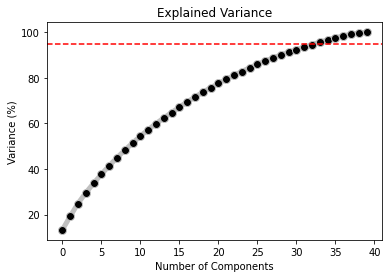

In [305]:
# Plotting the Cumulative Summation of the Explained Variance

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100,marker = 'o',color = 'silver',markerfacecolor='black', markersize=8,linewidth=5)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

# We want to preserve 95% of the variance so plot a horizontal line at 94% variance

plt.axhline(y=95, color='r', linestyle='--')
plt.show()

Text(0.5, 0, 'Principal Components')

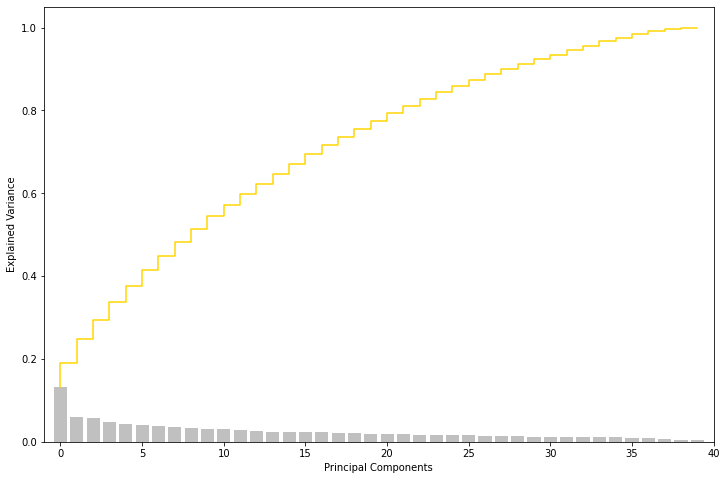

In [306]:
# Plotting the above in different form

plt.figure(figsize = (12, 8))
plt.step(range(40), np.cumsum(pca.explained_variance_ratio_),color='gold')
plt.bar(range(40), pca.explained_variance_ratio_,color='silver')
plt.xlim(-1, 40)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')

In [307]:
# Transforming the original train and test set to 37 components

# Fitting PCA on the training data

pca = PCA(34).fit(X_train)

# Transforming both training and test data

X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [308]:
# Checking the shape of data after PCA

X_train_transformed.shape

(2028, 34)

In [309]:
# Checking the shape of data after PCA

X_test_transformed.shape

(465, 34)

In [310]:
# Tuning the hyperparameters

var_smoothing = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]

param_grid = dict(var_smoothing=var_smoothing)

gnb = GaussianNB()

random_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, verbose=1, n_jobs=-1,scoring='accuracy',cv=5)

random_grid_result = random_grid.fit(X_train, y_train)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best Score:  0.7993164264428633
Best Params:  {'var_smoothing': 0.001}


In [311]:
gnb_clf_ht_pca = GaussianNB(**random_grid_result.best_params_)

gnb_clf_ht_pca.fit(X_train_transformed,y_train)

GaussianNB(var_smoothing=0.001)

In [312]:
gnb_clf_ht_pca.score(X_test_transformed,y_test)

0.7720430107526882

In [313]:
# Predicting the response for testing data
# Then displaying the classification report

y_pred = gnb_clf_ht_pca.predict(X_test_transformed)
print('Classification Report :\n')
print(classification_report(y_test, y_pred))

Classification Report :

              precision    recall  f1-score   support

          -1       0.96      0.79      0.87       435
           1       0.15      0.53      0.23        30

    accuracy                           0.77       465
   macro avg       0.55      0.66      0.55       465
weighted avg       0.91      0.77      0.83       465



- Overall accuracy is not of importance here as data is imbalanced.
- Getting low recall for class 1 relatively.
- Precision for class -1 is high.

In [314]:
train_accuracies.append(random_grid_result.best_score_)
test_accuracies.append(gnb_clf_ht_pca.score(X_test_transformed, y_test))
model.append('Gaussian NB')

In [315]:
# Calling the function to test on the accuracies of new sample data from the population with respect to old/original

my_sample_test(gnb_clf_ht_pca)

Ttest_relResult(statistic=-33.916017566263605, pvalue=0.018765038888868487)


Since the p-value is less than 0.05, we reject the null hypothesis and say that the samples are not similar and hence our model doen't feels stable.

**[ k-NN ]** 

In [316]:
# Picking and instantiating the model

knn_clf = KNeighborsClassifier()

In [317]:
# Training the model

knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [318]:
# Checking model's performance om training data

knn_clf.score(X_train,y_train)

0.8846153846153846

In [319]:
# Checking model's performance om test data

knn_clf.score(X_test,y_test)

0.5397849462365591

Let's apply all the cross validation techniques learnt so far.

In [320]:
# Let's choose the number of folds for CV

num_folds_cv = 5

**K-fold CV**

In [321]:
# K-fold cross validation (without stratification)

kfold = KFold(n_splits=num_folds_cv)
kfold_results = cross_val_score(knn_clf,X_train, y_train, cv=kfold)
kfold_results

array([0.60837438, 0.60591133, 0.74384236, 1.        , 1.        ])

In [322]:
# Let's see how good is our model

print('Mean of all the cross validated models is : ', kfold_results.mean())

Mean of all the cross validated models is :  0.7916256157635468


In [323]:
# Let's see how stable is our model

print('Standard devaition of the model based on cross validation', kfold_results.std())

Standard devaition of the model based on cross validation 0.17730979492665436


**LOOCV**

In [324]:
# Commenting out this code as it takes lots of time for being processed
# # LOOCV - Leave One Out Cross Validation

# scores = cross_val_score(knn_clf, X_train, y_train, cv=LeaveOneOut())
# scores

In [325]:
# # Let's see how good is our model

# print('Mean of all the cross validated models is : ', kfold_results.mean())

In [326]:
# # Let's see how stable is our model

# print('Standard devaition of the model based on cross validation', kfold_results.std())

**Stratified K-fold CV**

In [327]:
# Stratified k-fold cross validation

stratified_kfold = StratifiedKFold(n_splits = num_folds_cv)
stratified_kfold_results = cross_val_score(knn_clf, X_train, y_train, cv = stratified_kfold)
stratified_kfold_results

array([0.8226601 , 0.83004926, 0.85221675, 0.81481481, 0.81975309])

In [328]:
# Let's see how good is our model

print('Mean of all the cross validated models is : ', kfold_results.mean())

Mean of all the cross validated models is :  0.7916256157635468


In [329]:
# Let's see how stable is our model

print('Standard devaition of the model based on cross validation', kfold_results.std())

Standard devaition of the model based on cross validation 0.17730979492665436


Let's now do some hyperparameter tuning to get better results

In [330]:
# Tuning the hyperparameters

parameters = {
               'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']
             }

random_grid = RandomizedSearchCV(estimator=KNeighborsClassifier(),param_distributions=parameters, 
                          scoring='accuracy', verbose=1, n_jobs=-1,cv=5,random_state=101) 

random_grid_result = random_grid.fit(X_train, y_train)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.9082795110381318
Best Params:  {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}


In [331]:
knn_clf_ht = KNeighborsClassifier(**random_grid_result.best_params_)

knn_clf_ht.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [332]:
knn_clf_ht.score(X_test,y_test)

0.6817204301075269

We can see that test accuracy increased after tuning but still let's try other methods.

In [333]:
# Fitting the PCA on the original data to find the optimal number of principal components

pca = PCA().fit(X_train)

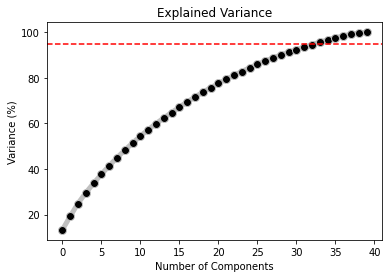

In [334]:
# Plotting the Cumulative Summation of the Explained Variance

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100,marker = 'o',color = 'silver',markerfacecolor='black', markersize=8,linewidth=5)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

# We want to preserve 95% of the variance so plot a horizontal line at 94% variance

plt.axhline(y=95, color='r', linestyle='--')
plt.show()

Text(0.5, 0, 'Principal Components')

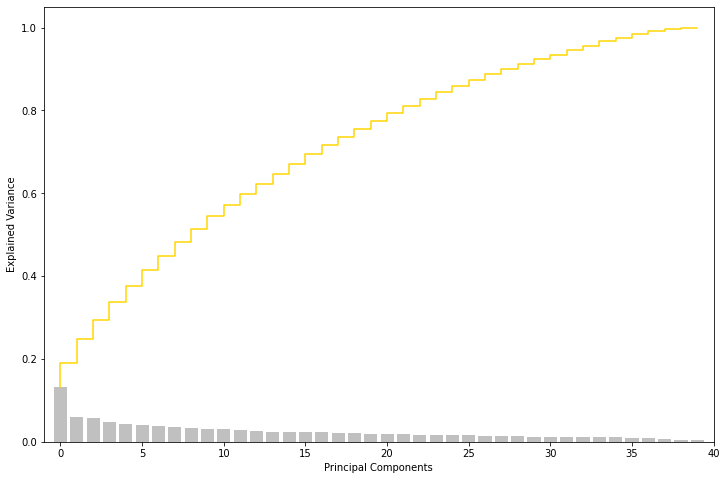

In [335]:
# Plotting the above in different form

plt.figure(figsize = (12, 8))
plt.step(range(40), np.cumsum(pca.explained_variance_ratio_),color='gold')
plt.bar(range(40), pca.explained_variance_ratio_,color='silver')
plt.xlim(-1, 40)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')

In [336]:
# Transforming the original train and test set to 37 components

# Fitting PCA on the training data

pca = PCA(34).fit(X_train)

# Transforming both training and test data

X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [337]:
# Checking the shape of data after PCA

X_train_transformed.shape

(2028, 34)

In [338]:
# Checking the shape of data after PCA

X_test_transformed.shape

(465, 34)

In [339]:
# Tuning the hyperparameters

parameters = {
               'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']
             }

random_grid = RandomizedSearchCV(estimator=KNeighborsClassifier(),param_distributions=parameters, 
                          scoring='accuracy', verbose=1, n_jobs=-1,cv=5,random_state=101) 

random_grid_result = random_grid.fit(X_train_transformed, y_train)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.8165699689837622
Best Params:  {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}


In [340]:
knn_clf_ht_pca = KNeighborsClassifier(**random_grid_result.best_params_)

knn_clf_ht_pca.fit(X_train_transformed,y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [341]:
knn_clf_ht_pca.score(X_test_transformed,y_test)

0.5032258064516129

In [342]:
# Predicting the response for testing data
# Then displaying the classification report

y_pred = knn_clf_ht_pca.predict(X_test_transformed)
print('Classification Report :\n')
print(classification_report(y_test, y_pred))

Classification Report :

              precision    recall  f1-score   support

          -1       0.97      0.48      0.65       435
           1       0.10      0.80      0.17        30

    accuracy                           0.50       465
   macro avg       0.53      0.64      0.41       465
weighted avg       0.92      0.50      0.61       465



- Overall accuracy is not of importance here as data is imbalanced.
- Getting good recall for class 1 relatively and one of the highest.
- Precision for class -1 is high.

In [343]:
train_accuracies.append(random_grid_result.best_score_)
test_accuracies.append(knn_clf_ht_pca.score(X_test_transformed, y_test))
model.append('k-NN')

In [344]:
# Calling the function to test on the accuracies of new sample data from the population with respect to old/original

my_sample_test(knn_clf_ht_pca)

Ttest_relResult(statistic=-1.526068044215216, pvalue=0.36928860781338374)


Since the p-value is greater than 0.05, we accept the null hypothesis and say that the samples are similar and hence our model feels stable.

**[ SVC ]** 

In [345]:
# Picking and instantiating the model

sv_clf = SVC()

In [346]:
# Training the model

sv_clf.fit(X_train, y_train)

SVC()

In [347]:
# Checking model's performance om training data

sv_clf.score(X_train,y_train)

0.9985207100591716

In [348]:
# Checking model's performance om test data

sv_clf.score(X_test,y_test)

0.8666666666666667

Let's apply all the cross validation techniques learnt so far.

In [349]:
# Let's choose the number of folds for CV

num_folds_cv = 5

**K-fold CV**

In [350]:
# K-fold cross validation (without stratification)

kfold = KFold(n_splits=num_folds_cv)
kfold_results = cross_val_score(sv_clf,X_train, y_train, cv=kfold)
kfold_results

array([0.95812808, 0.95566502, 0.97536946, 1.        , 1.        ])

In [351]:
# Let's see how good is our model

print('Mean of all the cross validated models is : ', kfold_results.mean())

Mean of all the cross validated models is :  0.9778325123152708


In [352]:
# Let's see how stable is our model

print('Standard devaition of the model based on cross validation', kfold_results.std())

Standard devaition of the model based on cross validation 0.019331445192461646


**LOOCV**

In [353]:
# Commenting out this code as it takes lots of time for being processed
# # LOOCV - Leave One Out Cross Validation

# scores = cross_val_score(sv_clf, X_train, y_train, cv=LeaveOneOut())
# scores

In [354]:
# # Let's see how good is our model

# print('Mean of all the cross validated models is : ', kfold_results.mean())

In [355]:
# # Let's see how stable is our model

# print('Standard devaition of the model based on cross validation', kfold_results.std())

**Stratified K-fold CV**

In [356]:
# Stratified k-fold cross validation

stratified_kfold = StratifiedKFold(n_splits = num_folds_cv)
stratified_kfold_results = cross_val_score(sv_clf, X_train, y_train, cv = stratified_kfold)
stratified_kfold_results

array([0.97783251, 0.97536946, 0.99014778, 0.98518519, 0.98024691])

In [357]:
# Let's see how good is our model

print('Mean of all the cross validated models is : ', kfold_results.mean())

Mean of all the cross validated models is :  0.9778325123152708


In [358]:
# Let's see how stable is our model

print('Standard devaition of the model based on cross validation', kfold_results.std())

Standard devaition of the model based on cross validation 0.019331445192461646


Let's now do some hyperparameter tuning to get better results

In [359]:
# Tuning the hyperparameters

parameters = {
              'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']
             }

random_grid = RandomizedSearchCV(estimator= SVC(random_state=101),param_distributions=parameters, 
                          scoring='accuracy', verbose=1, n_jobs=-1,cv=5,random_state=101) 

random_grid_result = random_grid.fit(X_train, y_train)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.9965505078148758
Best Params:  {'kernel': 'rbf', 'gamma': 0.1, 'C': 100}


In [360]:
sv_clf_ht = SVC(**random_grid_result.best_params_,random_state=101)

sv_clf_ht.fit(X_train,y_train)

SVC(C=100, gamma=0.1, random_state=101)

In [361]:
sv_clf_ht.score(X_test,y_test)

0.9311827956989247

We can see that test accuracy improved after tuning but still let's try other methods.

In [362]:
# Fitting the PCA on the original data to find the optimal number of principal components

pca = PCA().fit(X_train)

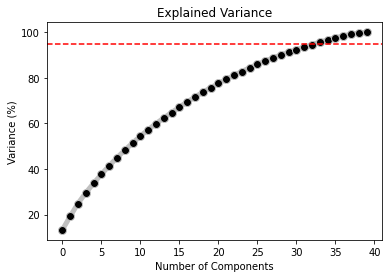

In [363]:
# Plotting the Cumulative Summation of the Explained Variance

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100,marker = 'o',color = 'silver',markerfacecolor='black', markersize=8,linewidth=5)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

# We want to preserve 95% of the variance so plot a horizontal line at 94% variance

plt.axhline(y=95, color='r', linestyle='--')
plt.show()

Text(0.5, 0, 'Principal Components')

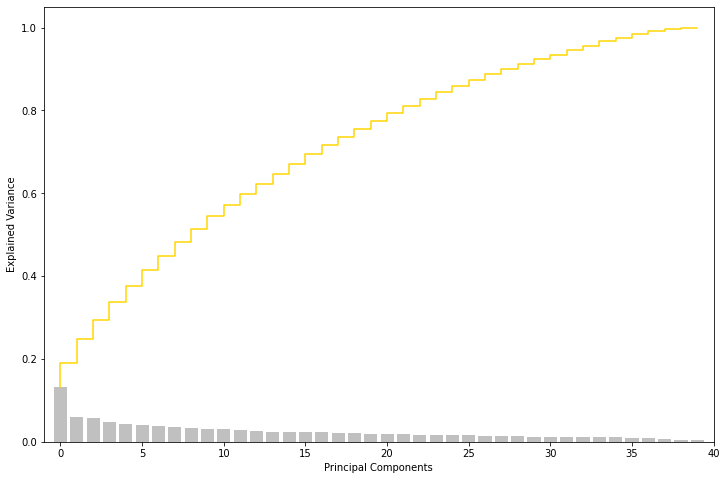

In [364]:
# Plotting the above in different form

plt.figure(figsize = (12, 8))
plt.step(range(40), np.cumsum(pca.explained_variance_ratio_),color='gold')
plt.bar(range(40), pca.explained_variance_ratio_,color='silver')
plt.xlim(-1, 40)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')

In [365]:
# Transforming the original train and test set to 37 components

# Fitting PCA on the training data

pca = PCA(34).fit(X_train)

# Transforming both training and test data

X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [366]:
# Checking the shape of data after PCA

X_train_transformed.shape

(2028, 34)

In [367]:
# Checking the shape of data after PCA

X_test_transformed.shape

(465, 34)

In [368]:
# Tuning the hyperparameters

parameters = {
              'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']
             }

random_grid = RandomizedSearchCV(estimator= SVC(random_state=101),param_distributions=parameters, 
                          scoring='accuracy', verbose=1, n_jobs=-1,cv=5,random_state=101) 

random_grid_result = random_grid.fit(X_train_transformed, y_train)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.9965505078148758
Best Params:  {'kernel': 'rbf', 'gamma': 0.1, 'C': 100}


In [369]:
sv_clf_ht_pca = SVC(**random_grid_result.best_params_,random_state=101)

sv_clf_ht_pca.fit(X_train_transformed,y_train)

SVC(C=100, gamma=0.1, random_state=101)

In [370]:
sv_clf_ht_pca.score(X_test_transformed,y_test)

0.9311827956989247

In [371]:
# Predicting the response for testing data
# Then displaying the classification report

y_pred = sv_clf_ht_pca.predict(X_test_transformed)
print('Classification Report :\n')
print(classification_report(y_test, y_pred))

Classification Report :

              precision    recall  f1-score   support

          -1       0.94      0.99      0.96       435
           1       0.38      0.10      0.16        30

    accuracy                           0.93       465
   macro avg       0.66      0.54      0.56       465
weighted avg       0.90      0.93      0.91       465



- Overall accuracy is not of importance here as data is imbalanced.
- Getting low recall for class 1 relatively.
- Precision for class -1 is high.

In [372]:
train_accuracies.append(random_grid_result.best_score_)
test_accuracies.append(sv_clf_ht_pca.score(X_test_transformed, y_test))
model.append('SVC')

In [373]:
# Calling the function to test on the accuracies of new sample data from the population with respect to old/original

my_sample_test(sv_clf_ht_pca)

Ttest_relResult(statistic=-0.7330753040856135, pvalue=0.5972864145543042)


Since the p-value is greater than 0.05, we accept the null hypothesis and say that the samples are similar and hence our model feels stable.

**[ Decision Tree ]** 

In [374]:
# Picking and instantiating the model

dt_clf = DecisionTreeClassifier()

In [375]:
# Training the model

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [376]:
# Checking model's performance om training data

dt_clf.score(X_train,y_train)

1.0

In [377]:
# Checking model's performance om test data

dt_clf.score(X_test,y_test)

0.5741935483870968

Let's apply all the cross validation techniques learnt so far.

In [378]:
# Let's choose the number of folds for CV

num_folds_cv = 5

**K-fold CV**

In [379]:
# K-fold cross validation (without stratification)

kfold = KFold(n_splits=num_folds_cv)
kfold_results = cross_val_score(dt_clf,X_train, y_train, cv=kfold)
kfold_results

array([0.84975369, 0.79802956, 0.87438424, 0.92098765, 0.90123457])

In [380]:
# Let's see how good is our model

print('Mean of all the cross validated models is : ', kfold_results.mean())

Mean of all the cross validated models is :  0.8688779419813901


In [381]:
# Let's see how stable is our model

print('Standard devaition of the model based on cross validation', kfold_results.std())

Standard devaition of the model based on cross validation 0.04284372342010781


**LOOCV**

In [382]:
# Commenting out this code as it takes lots of time for being processed
# # LOOCV - Leave One Out Cross Validation

# scores = cross_val_score(dt_clf, X_train, y_train, cv=LeaveOneOut())
# scores

In [383]:
# # Let's see how good is our model

# print('Mean of all the cross validated models is : ', kfold_results.mean())

In [384]:
# # Let's see how stable is our model

# print('Standard devaition of the model based on cross validation', kfold_results.std())

**Stratified K-fold CV**

In [385]:
# Stratified k-fold cross validation

stratified_kfold = StratifiedKFold(n_splits = num_folds_cv)
stratified_kfold_results = cross_val_score(dt_clf, X_train, y_train, cv = stratified_kfold)
stratified_kfold_results

array([0.84975369, 0.88423645, 0.908867  , 0.90864198, 0.91604938])

In [386]:
# Let's see how good is our model

print('Mean of all the cross validated models is : ', kfold_results.mean())

Mean of all the cross validated models is :  0.8688779419813901


In [387]:
# Let's see how stable is our model

print('Standard devaition of the model based on cross validation', kfold_results.std())

Standard devaition of the model based on cross validation 0.04284372342010781


Let's now do some hyperparameter tuning to get better results

In [388]:
# Tuning the hyperparameters

parameters = {
                'max_depth': [2, 3, 5, 10, 20],
                'min_samples_leaf': [5, 10, 20, 50, 100],
                'criterion': ["gini", "entropy"]
             }

random_grid = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=101),param_distributions=parameters, 
                          scoring='accuracy', verbose=1, n_jobs=-1,cv=5,random_state=101) 

random_grid_result = random_grid.fit(X_train, y_train)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.8634203004317946
Best Params:  {'min_samples_leaf': 10, 'max_depth': 20, 'criterion': 'entropy'}


In [389]:
dt_clf_ht = DecisionTreeClassifier(**random_grid_result.best_params_,random_state=101)

dt_clf_ht.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       random_state=101)

In [390]:
dt_clf_ht.score(X_test,y_test)

0.44946236559139785

We can see that test accuracy dropped after tuning so let's try other methods.

In [391]:
# Fitting the PCA on the original data to find the optimal number of principal components

pca = PCA().fit(X_train)

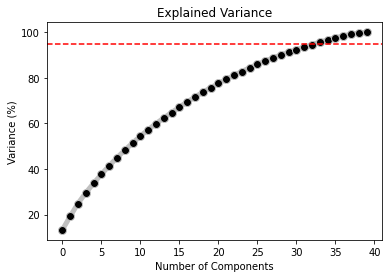

In [392]:
# Plotting the Cumulative Summation of the Explained Variance

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100,marker = 'o',color = 'silver',markerfacecolor='black', markersize=8,linewidth=5)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

# We want to preserve 95% of the variance so plot a horizontal line at 94% variance

plt.axhline(y=95, color='r', linestyle='--')
plt.show()

Text(0.5, 0, 'Principal Components')

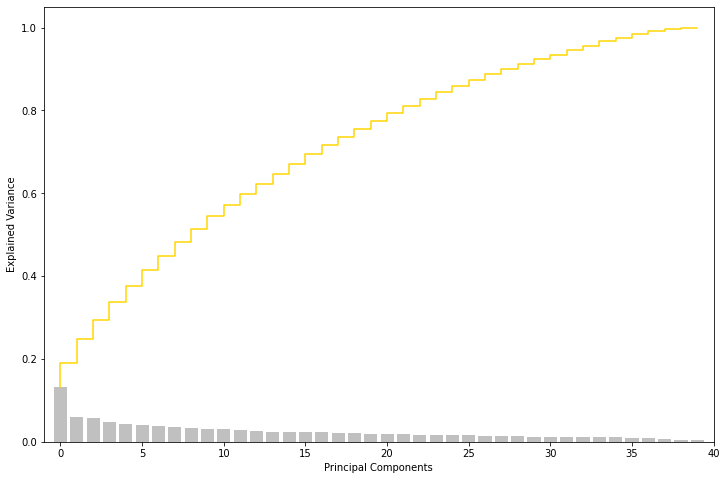

In [393]:
# Plotting the above in different form

plt.figure(figsize = (12, 8))
plt.step(range(40), np.cumsum(pca.explained_variance_ratio_),color='gold')
plt.bar(range(40), pca.explained_variance_ratio_,color='silver')
plt.xlim(-1, 40)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')

In [394]:
# Transforming the original train and test set to 37 components

# Fitting PCA on the training data

pca = PCA(34).fit(X_train)

# Transforming both training and test data

X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [395]:
# Checking the shape of data after PCA

X_train_transformed.shape

(2028, 34)

In [396]:
# Checking the shape of data after PCA

X_test_transformed.shape

(465, 34)

In [397]:
# Tuning the hyperparameters

parameters = {
                'max_depth': [2, 3, 5, 10, 20],
                'min_samples_leaf': [5, 10, 20, 50, 100],
                'criterion': ["gini", "entropy"]
             }

random_grid = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=101),param_distributions=parameters, 
                          scoring='accuracy', verbose=1, n_jobs=-1,cv=5,random_state=101) 

random_grid_result = random_grid.fit(X_train_transformed, y_train)

print('Best Score: ', random_grid_result.best_score_) 
print('Best Params: ', random_grid_result.best_params_) 


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.8589953171562368
Best Params:  {'min_samples_leaf': 10, 'max_depth': 20, 'criterion': 'entropy'}


In [398]:
dt_clf_ht_pca = DecisionTreeClassifier(**random_grid_result.best_params_,random_state=101)

dt_clf_ht_pca.fit(X_train_transformed,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       random_state=101)

In [399]:
dt_clf_ht_pca.score(X_test_transformed,y_test)

0.7354838709677419

In [400]:
# Predicting the response for testing data
# Then displaying the classification report

y_pred = dt_clf_ht_pca.predict(X_test_transformed)
print('Classification Report :\n')
print(classification_report(y_test, y_pred))

Classification Report :

              precision    recall  f1-score   support

          -1       0.96      0.75      0.84       435
           1       0.12      0.50      0.20        30

    accuracy                           0.74       465
   macro avg       0.54      0.63      0.52       465
weighted avg       0.90      0.74      0.80       465



- Overall accuracy is not of importance here as data is imbalanced.
- Getting low recall for class 1 relatively.
- Precision for class -1 is high.

In [401]:
train_accuracies.append(random_grid_result.best_score_)
test_accuracies.append(dt_clf_ht_pca.score(X_test_transformed, y_test))
model.append('Decision Tree')

In [402]:
# Calling the function to test on the accuracies of new sample data from the population with respect to old/original

my_sample_test(dt_clf_ht_pca)

Ttest_relResult(statistic=-1.4945578915313613, pvalue=0.37540278348998485)


Since the p-value is greater than 0.05, we accept the null hypothesis and say that the samples are similar and hence our model feels stable.

### <center>Display and compare all the models designed with their train and test accuracies

In [403]:
my_dict = {'Model Name': model, 'Training Accuracy': train_accuracies , 'Testing Accuracy': test_accuracies }

In [404]:
models_data = pd.DataFrame(my_dict)

In [405]:
# Sorting based on test accuracy

models_data.sort_values(by='Testing Accuracy',ascending=False).set_index('Model Name').style.background_gradient(cmap='mako')

,Training Accuracy,Testing Accuracy
Model Name,,
SVC,0.996551,0.931183
Random Forest,0.975350,0.886022
XGBM,0.972889,0.881720
GBM,0.967954,0.832258
AdaBoost,0.923576,0.789247
Gaussian NB,0.799316,0.772043
Light GBM,0.887581,0.746237
Decision Tree,0.858995,0.735484
Logistic Regression,0.823482,0.576344


### <center>Select the final best trained model along with your detailed comments for selecting this model

- According to the all the statistics we got from various models about its performance we can conclude that Light GBM, Logistic Regression and k-NN are our best models owing to the following reasons:
    - Please note, all the above three models have got best scores after PCA.
    - We know that the company cannot let out faulty products in the market as it will hamper it's reputation so first of all recall of 'Fail' or '1' is of high importance.
    - Next the precision for 'Pass' or '-1' should be important for the same reason.
    - Based on above two statements, the best model out of 3 comes out to be Logistic Regression. Overall accuracy is not important for classes which are not balanced which is the case here.
    - Even we can argue that for some companies recall for 'Pass'(letting out little bit more faulty products) can be important when slight compromise can be made on the recall of 'Fail' so in that case Light GBM might become the best model but this is rare as the faulty products leaked into market will have to come back and retesting and logistics cost can increase.Instead if a product was not faulty but was marked as faulty can be made not faulty during the initial testing phase itself.
    - Hence, we will focus on the recall of 1 and precision of -1 as stated in second and third statements and select Logistic Regression as our final model.
    

### <center>Pickle the selected model for future use

In [406]:
# Pickling the model
saved_model = pickle.dumps(lr_clf_ht_pca)
 
# Loading the pickled model to cross check values
lr_clf_pickle = pickle.loads(saved_model)
 
# Using the loaded pickled model to make predictions
lr_clf_pickle.predict(X_test_transformed)


array([-1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
       -1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,
        1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,
       -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
       -1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,
        1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,
        1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,
        1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,
        1, -1,  1, -1,  1

### <center>Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results

In [407]:
fd_file = pd.read_excel('Future_predictions.xlsx')

In [408]:
fd_file

,Time,0,1,2,3,4,5,6,7,8,...,580,581,582,583,584,585,586,587,588,589
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100,100.3967,0.1235,1.5031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100,100.3967,0.1235,1.5287,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.5816,...,NaN,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
7,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100,106.2400,0.1185,1.5153,...,0.0063,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310
8,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100,106.2400,0.1185,1.5358,...,0.0045,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525
9,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100,106.2400,0.1185,1.5381,...,0.0073,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294


In [409]:
fd_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Columns: 591 entries, Time to 589
dtypes: datetime64[ns](1), float64(458), int64(132)
memory usage: 83.2 KB


In [410]:
fd_file.describe()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.000000,18.000000,18.00000,18.000000,...,13.000000,13.000000,18.000000,18.000000,18.000000,18.000000,17.000000,17.000000,17.000000,17.000000
mean,3000.383333,2526.248889,2222.672217,1200.046806,1.208883,100.0,102.962106,0.122056,1.50855,0.003572,...,0.006477,93.587208,0.498478,0.041128,0.009572,8.454061,0.024353,0.019053,0.005965,86.399259
std,49.608715,70.409195,28.412225,255.818978,0.284415,0.0,3.395897,0.002388,0.03983,0.017393,...,0.002963,43.174452,0.005998,0.108953,0.023741,22.725950,0.011960,0.009203,0.002755,40.452580
min,2920.070000,2428.370000,2184.433300,877.626600,0.788400,100.0,95.487800,0.118500,1.43680,-0.027000,...,0.003400,44.007700,0.480000,0.007800,0.002100,1.535200,0.009600,0.009800,0.003400,44.007700
25%,2964.897500,2479.525000,2195.394425,1004.469200,0.871025,100.0,100.883350,0.119950,1.49030,-0.010075,...,0.004500,73.843200,0.496025,0.010650,0.003400,2.133925,0.018400,0.014900,0.004400,57.812200
50%,3005.080000,2523.530000,2227.522200,1152.301300,1.320400,100.0,103.788350,0.122300,1.51485,0.012750,...,0.006000,82.860200,0.499150,0.015150,0.003850,3.037500,0.020200,0.015100,0.005200,82.098900
75%,3031.912500,2560.637500,2245.016675,1389.974875,1.395000,100.0,104.848900,0.124075,1.53460,0.016125,...,0.007300,100.274500,0.501375,0.016850,0.004350,3.387075,0.034200,0.020100,0.007100,95.031000
max,3095.780000,2690.150000,2270.255600,1698.017200,1.533400,100.0,107.871100,0.125700,1.58160,0.025000,...,0.014800,208.204500,0.507700,0.476600,0.104500,99.303200,0.058400,0.048400,0.014800,208.204500


Now let's make the same transformations we did to our original data

In [411]:
# Let's prefix column names for better understanding

fd_file = fd_file.add_prefix('col_')

In [412]:
# Let's add relevant time features

time_fd_file = pd.DataFrame({
              "month": fd_file['col_Time'].dt.month,
              "day": fd_file['col_Time'].dt.day,
              "week": fd_file['col_Time'].dt.week,
              })

In [413]:
# Creating dataframe with time features after extracting the same
# Dropping the data-time column for the same as features are already extracted

t2_data = pd.concat([time_fd_file,fd_file],axis=1).drop(columns='col_Time')

In [414]:
t2_data.head()

,month,day,week,col_0,col_1,col_2,col_3,col_4,col_5,col_6,...,col_580,col_581,col_582,col_583,col_584,col_585,col_586,col_587,col_588,col_589
0,7,19,29,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,97.6133,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,7,19,29,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,7,19,29,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,7,19,29,2988.72,2479.90,2199.0333,909.7926,1.3204,100,104.2367,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,7,19,29,3032.24,2502.87,2233.3667,1326.5200,1.5334,100,100.3967,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [415]:
# Filtering out unwanted variables

t2_data = t2_data[X.columns.to_list()]

In [416]:
t2_data.head()

,month,day,week,col_4,col_14,col_19,col_21,col_28,col_38,col_56,...,col_183,col_210,col_214,col_247,col_423,col_460,col_511,col_542,col_543,col_547
0,7,19,29,1.3602,7.9558,12.5190,-5419.00,64.2333,86.9555,0.9317,...,16.713,0.0772,0.0704,NaN,53.6840,29.9394,0.0000,0.1096,0.0078,395.570
1,7,19,29,0.8294,10.1548,12.4608,-5441.50,68.4222,87.5241,0.9324,...,16.358,0.0566,0.0468,NaN,61.8918,40.4475,0.0000,0.1096,0.0078,408.798
2,7,19,29,1.5102,9.5157,12.5404,-5447.75,67.1333,84.7327,0.9139,...,22.912,0.0339,0.0401,0.1729,50.6425,32.3594,244.2748,0.1096,0.0078,411.136
3,7,19,29,1.3204,9.6052,12.4782,-5468.25,62.9333,86.6867,0.9139,...,22.562,0.1248,0.0708,0.0191,94.4594,27.6824,0.0000,0.1096,0.0078,372.822
4,7,19,29,1.5334,10.5661,12.4735,-5476.25,62.8333,86.1468,0.9298,...,37.715,0.0915,0.0797,NaN,85.2255,30.8924,0.0000,0.1096,0.0078,399.914


In [417]:
# Imputing missing values with median

t2_data = t2_data.apply(lambda x: x.fillna(x.median()),axis=0)

In [418]:
# Scaling the future data

X_future_data = t2_data.apply(zscore)

In [419]:
# Checking for null values

X_future_data.isna().sum()

month      18
day         0
week        0
col_4       0
col_14      0
col_19      0
col_21      0
col_28      0
col_38      0
col_56      0
col_58      0
col_59      0
col_63      0
col_64      0
col_79      0
col_90      0
col_95      0
col_103     0
col_112     0
col_117     0
col_121     0
col_122     0
col_129     0
col_143     0
col_145     0
col_146     0
col_151     0
col_160     0
col_180     0
col_181     0
col_183     0
col_210     0
col_214     0
col_247     0
col_423     0
col_460     0
col_511     0
col_542     0
col_543    18
col_547     0
dtype: int64

Owing to the zero variance in two features in the future data we can see null values.Hence, it's needed to be taken care of.

Let's impute the missing values from in selected future data by imputing them with values from our training data.

In [420]:
# Calculating the appropriate z score with respect to our future data

impute_month = (t2_data['month'][0] - X_train_c['month'].mean())/X_train_c['month'].std()

impute_col_543 = (t2_data['col_543'][0] - X_train_c['col_543'].mean())/X_train_c['col_543'].std()

In [421]:
# Filling the null values in the dataset with appropriate values

X_future_data['month'] = impute_month

X_future_data['col_543'] = impute_col_543

In [422]:
# Checking again for null values

X_future_data.isna().sum()

month      0
day        0
week       0
col_4      0
col_14     0
col_19     0
col_21     0
col_28     0
col_38     0
col_56     0
col_58     0
col_59     0
col_63     0
col_64     0
col_79     0
col_90     0
col_95     0
col_103    0
col_112    0
col_117    0
col_121    0
col_122    0
col_129    0
col_143    0
col_145    0
col_146    0
col_151    0
col_160    0
col_180    0
col_181    0
col_183    0
col_210    0
col_214    0
col_247    0
col_423    0
col_460    0
col_511    0
col_542    0
col_543    0
col_547    0
dtype: int64

We can see that null values have been handled.

In [423]:
# Transforming the future data set to 34 components

# Fitting PCA on the training data

pca = PCA(34).fit(X_train)

# Transforming the data

X_test_transformed_fd = pca.transform(X_future_data)

In [424]:
# Predicting the target values for future data given in the context

lr_clf_ht_pca.predict(X_test_transformed_fd)

array([ 1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,
       -1])

In [425]:
# Checking how balance are the classes that were predicted

Counter(lr_clf_ht_pca.predict(X_test_transformed_fd))

Counter({1: 8, -1: 10})

We can see that the classes looks quite balanced for our prediction.

## 6. Conclusion and improvisation:

### <center>Write your conclusion on the results

Following inferences can be drawn in a step-wise manner:
- Firstly, let's talk about the beginning.
- The data was taken and orgainsed in proper shape with the relevant columns.
- Then, various filters were applied like missing value ratio, low variance, multicollinearity etc were applied to remove unwanted variables.
- Missing values were handled systematically.
- Then, date-time related features were extracted and necessary modifications to the dataframe was done.
- After the above, analysis was done on features using statistical tests and unwanted features were remove more.
- Overall till this step we came down to 40 important features overall from 591 features.
- Basic modelling was done and validated using various CV techniques.
- Now further using a defined dimensionality reduction technique we reduced more features with acceptable explained variance threshold.
- Finally we created various models with 34 features which gave us better results after hyperparameter tuning.
- Out of these models Logistic Regression gave us the best results in terms of recall of 1 and precision of -1 (Details have been explained earlier).
- At, the end we used future data to predict the target class using the best selected model and printed out the results.
- Based on the values predicted, the classes seemed pretty balanced.